In [2]:
import sys
import os

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display

sys.path.append(os.path.abspath("../src"))

from visuals.plots import *


In [92]:
omega_list = [1.0, 0.0, -0.9, -0.99, -1.0]

for omega in omega_list:
    command = f"julia ../src/sampling/main.jl --omega {omega}"
    os.system(command)


Running simulation with the following parameters:
N = 100, T = 10K, r = 100, omega = 1.0, alpha = 1.01, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:11:12:18


Finished simulation
Saved Z values to data/Zt/N100_T10K_r100_omega1.0_alpha1.01.csv
Running simulation with the following parameters:
N = 100, T = 10K, r = 100, omega = 0.0, alpha = 1.01, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:23:00:42


Finished simulation
Saved Z values to data/Zt/N100_T10K_r100_omega0.0_alpha1.01.csv
Running simulation with the following parameters:
N = 100, T = 10K, r = 100, omega = -0.9, alpha = 1.01, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:41


Finished simulation
Saved Z values to data/Zt/N100_T10K_r100_omega-0.9_alpha1.01.csv
Running simulation with the following parameters:
N = 100, T = 10K, r = 100, omega = -0.99, alpha = 1.01, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:1805:46


Finished simulation
Saved Z values to data/Zt/N100_T10K_r100_omega-0.99_alpha1.01.csv
Running simulation with the following parameters:
N = 100, T = 10K, r = 100, omega = -1.0, alpha = 1.01, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:00:16


Finished simulation
Saved Z values to data/Zt/N100_T10K_r100_omega-1.0_alpha1.01.csv


In [2]:
omega1 = pd.read_csv("data/Zt/N100_T10K_r100_omega1.0_alpha1.01.csv")
omega0 = pd.read_csv("data/Zt/N100_T10K_r100_omega0.0_alpha1.01.csv")
omega_09 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.9_alpha1.01.csv")
omega_099 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha1.01.csv")
omega_1 = pd.read_csv("data/Zt/N100_T10K_r100_omega-1.0_alpha1.01.csv")

# データフレームの結合
# 平均値のためのデータフレーム
mean_df = pd.concat([omega1['t'], omega1['Z'], omega0['Z'], omega_09['Z'], omega_099['Z'], omega_1['Z']], axis=1)
mean_df = mean_df[mean_df['t'] > 100]
mean_df.columns = ["t", "omega=1.0", "omega=0.0", "omega=-0.9", "omega=-0.99", "omega=-1.0"]

display(mean_df)

# 標準偏差のためのデータフレーム
std_df = pd.concat([omega1['t'], omega1['std'], omega0['std'], omega_09['std'], omega_099['std'], omega_1['std']], axis=1)
std_df = std_df[std_df['t'] > 100]
std_df.columns = ["t", "omega=1.0", "omega=0.0", "omega=-0.9", "omega=-0.99", "omega=-1.0"]


display(std_df)


,t,omega=1.0,omega=0.0,omega=-0.9,omega=-0.99,omega=-1.0
100,101,0.505071,0.505627,0.504936,0.505448,0.504716
101,102,0.500095,0.500628,0.265058,0.255731,0.499784
102,103,0.500168,0.500648,0.270116,0.255744,0.499876
103,104,0.500300,0.500839,0.270209,0.260839,0.500038
104,105,0.500385,0.500999,0.275250,0.260905,0.500000
...,...,...,...,...,...,...
9995,9996,0.513772,0.524181,0.613088,0.674541,0.682584
9996,9997,0.513711,0.524730,0.612616,0.674777,0.682604
9997,9998,0.513176,0.524748,0.612227,0.674087,0.682616
9998,9999,0.513494,0.524332,0.613112,0.674452,0.682667


,t,omega=1.0,omega=0.0,omega=-0.9,omega=-0.99,omega=-1.0
100,101,0.004625,0.004997,0.005184,0.005632,0.004789
101,102,0.004529,0.005043,0.003680,0.003507,0.004706
102,103,0.004799,0.005019,0.003736,0.003543,0.004643
103,104,0.004724,0.005173,0.003697,0.003653,0.004651
104,105,0.004791,0.005310,0.003821,0.003707,0.004697
...,...,...,...,...,...,...
9995,9996,0.008275,0.008766,0.019888,0.022841,0.031297
9996,9997,0.007229,0.010606,0.020083,0.023167,0.031329
9997,9998,0.007522,0.009290,0.019360,0.023460,0.031359
9998,9999,0.007046,0.009970,0.019651,0.023136,0.031390


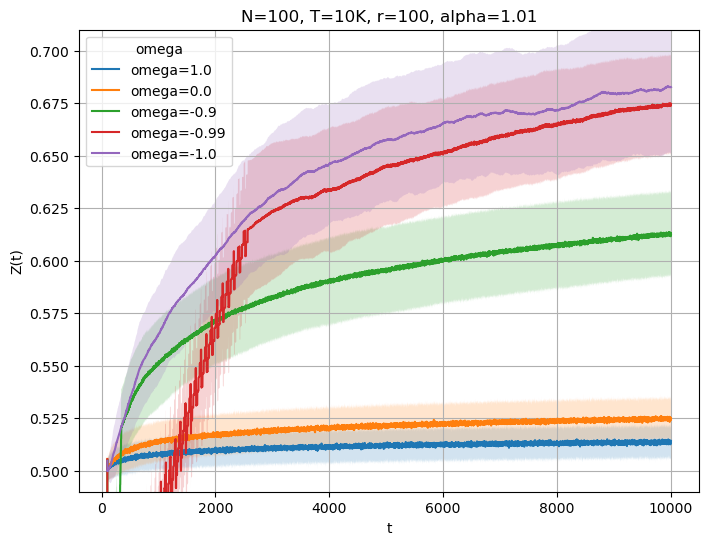

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns

# 平均値データフレームを "long format" に変換
mean_long = pd.melt(mean_df, id_vars=['t'], var_name='omega', value_name='Z(t)')

# lineplot を作成（平均値）
plt.figure(figsize=(8, 6))
sns.lineplot(data=mean_long, x='t', y='Z(t)', hue='omega', palette="tab10")

# 標準偏差の帯を追加
for column in mean_df.columns[1:]:
    omega = column
    subset_mean = mean_df[['t', omega]]
    subset_std = std_df[['t', omega]]
    plt.fill_between(subset_mean['t'], subset_mean[omega] - subset_std[omega], subset_mean[omega] + subset_std[omega], alpha=0.2)

plt.title("N=100, T=10K, r=100, alpha=1.01")
plt.grid()
plt.ylim(0.49, 0.71)
plt.show()


In [34]:
omega_list = [1.0, 0.0, -0.9, -0.99, -1.0]
r = 50

for omega in omega_list:
    command = f"julia ../src/sampling/main.jl --omega {omega} --r {r}"
    os.system(command)


Running simulation with the following parameters:
N = 100, T = 10K, r = 50, omega = 1.0, alpha = 1.01, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:00:48:48:02


Finished simulation
Saved Z values to data/Zt/N100_T10K_r50_omega1.0_alpha1.01.csv
Running simulation with the following parameters:
N = 100, T = 10K, r = 50, omega = 0.0, alpha = 1.01, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:00:5400:35


Finished simulation
Saved Z values to data/Zt/N100_T10K_r50_omega0.0_alpha1.01.csv
Running simulation with the following parameters:
N = 100, T = 10K, r = 50, omega = -0.9, alpha = 1.01, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:00:50:28:53


Finished simulation
Saved Z values to data/Zt/N100_T10K_r50_omega-0.9_alpha1.01.csv
Running simulation with the following parameters:
N = 100, T = 10K, r = 50, omega = -0.99, alpha = 1.01, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:00:3753:03


Finished simulation
Saved Z values to data/Zt/N100_T10K_r50_omega-0.99_alpha1.01.csv
Running simulation with the following parameters:
N = 100, T = 10K, r = 50, omega = -1.0, alpha = 1.01, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:00:09


Finished simulation
Saved Z values to data/Zt/N100_T10K_r50_omega-1.0_alpha1.01.csv


In [35]:
omega1 = pd.read_csv("data/Zt/N100_T10K_r50_omega1.0_alpha1.01.csv")
omega0 = pd.read_csv("data/Zt/N100_T10K_r50_omega0.0_alpha1.01.csv")
omega_09 = pd.read_csv("data/Zt/N100_T10K_r50_omega-0.9_alpha1.01.csv")
omega_099 = pd.read_csv("data/Zt/N100_T10K_r50_omega-0.99_alpha1.01.csv")
omega_1 = pd.read_csv("data/Zt/N100_T10K_r50_omega-1.0_alpha1.01.csv")

# データフレームの結合
# 平均値のためのデータフレーム
mean_df = pd.concat([omega1['t'], omega1['Z'], omega0['Z'], omega_09['Z'], omega_099['Z'], omega_1['Z']], axis=1)
# mean_df = mean_df[mean_df['t'] > 100]
mean_df.columns = ["t", "omega=1.0", "omega=0.0", "omega=-0.9", "omega=-0.99", "omega=-1.0"]

display(mean_df)

# 標準偏差のためのデータフレーム
std_df = pd.concat([omega1['t'], omega1['std'], omega0['std'], omega_09['std'], omega_099['std'], omega_1['std']], axis=1)
# std_df = std_df[std_df['t'] > 100]
std_df.columns = ["t", "omega=1.0", "omega=0.0", "omega=-0.9", "omega=-0.99", "omega=-1.0"]


display(std_df)


,t,omega=1.0,omega=0.0,omega=-0.9,omega=-0.99,omega=-1.0
0,1,0.009794,0.010056,0.010112,0.010170,0.010034
1,2,0.019792,0.020026,0.020028,0.020290,0.020024
2,3,0.029846,0.029996,0.030084,0.030194,0.030116
3,4,0.039768,0.040026,0.040176,0.040246,0.040124
4,5,0.049730,0.050038,0.050302,0.050220,0.050156
...,...,...,...,...,...,...
9995,9996,0.513482,0.525880,0.605538,0.660584,0.641028
9996,9997,0.514014,0.526088,0.604162,0.661752,0.641064
9997,9998,0.511908,0.525436,0.604156,0.660682,0.641078
9998,9999,0.513340,0.525206,0.604372,0.661506,0.641112


,t,omega=1.0,omega=0.0,omega=-0.9,omega=-0.99,omega=-1.0
0,1,0.001015,0.001100,0.001000,0.000980,0.001101
1,2,0.001390,0.001412,0.001475,0.001524,0.001351
2,3,0.001747,0.001750,0.001872,0.001949,0.001635
3,4,0.001984,0.002020,0.002223,0.002073,0.001969
4,5,0.002151,0.002357,0.002545,0.002249,0.002281
...,...,...,...,...,...,...
9995,9996,0.010574,0.012528,0.026016,0.026651,0.035807
9996,9997,0.010097,0.012764,0.025312,0.026571,0.035868
9997,9998,0.009473,0.012081,0.024520,0.027069,0.035807
9998,9999,0.009553,0.013129,0.025239,0.026823,0.035749


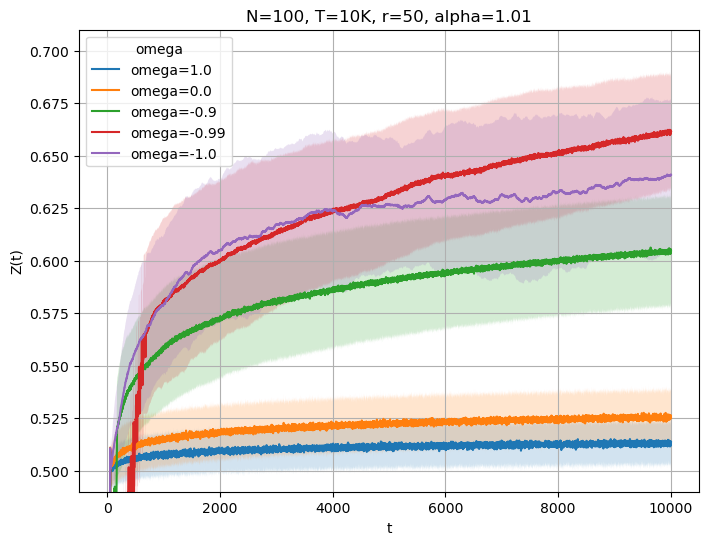

In [37]:
from matplotlib import pyplot as plt
import seaborn as sns

# 平均値データフレームを "long format" に変換
mean_long = pd.melt(mean_df, id_vars=['t'], var_name='omega', value_name='Z(t)')

# lineplot を作成（平均値）
plt.figure(figsize=(8, 6))
sns.lineplot(data=mean_long, x='t', y='Z(t)', hue='omega', palette="tab10")

# 標準偏差の帯を追加
for column in mean_df.columns[1:]:
    omega = column
    subset_mean = mean_df[['t', omega]]
    subset_std = std_df[['t', omega]]
    plt.fill_between(subset_mean['t'], subset_mean[omega] - subset_std[omega], subset_mean[omega] + subset_std[omega], alpha=0.2)

plt.title("N=100, T=10K, r=50, alpha=1.01")
plt.grid()
plt.ylim(0.49, 0.71)
plt.show()


In [2]:
alpha_list = [0.9, 0.99, 1.0, 1.01, 1.02, 1.03, 1.05, 1.07, 1.1, 1.5, 2.0]
T = 100000 # 100K
r = 10
omega = -1.0

for alpha in alpha_list:
    command = f"julia ../src/sampling/main.jl --T {T} --r {r} --omega {omega} --alpha {alpha}"
    os.system(command)


Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -1.0, alpha = 0.9, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:21


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-1.0_alpha0.9.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -1.0, alpha = 0.99, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:20


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-1.0_alpha0.99.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -1.0, alpha = 1.0, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:19


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-1.0_alpha1.0.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -1.0, alpha = 1.01, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:19


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-1.0_alpha1.01.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -1.0, alpha = 1.02, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:19


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-1.0_alpha1.02.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -1.0, alpha = 1.03, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:19


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-1.0_alpha1.03.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -1.0, alpha = 1.05, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:19


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-1.0_alpha1.05.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -1.0, alpha = 1.07, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:18


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-1.0_alpha1.07.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -1.0, alpha = 1.1, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:18


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-1.0_alpha1.1.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -1.0, alpha = 1.5, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:18


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-1.0_alpha1.5.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -1.0, alpha = 2.0, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:20


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-1.0_alpha2.0.csv


In [3]:
alpha_list = [0.9, 0.99, 1.01, 1.02, 1.03, 1.1, 1.5, 2.0]
T = 100000 # 100K
r = 10
omega = -0.99

for alpha in alpha_list:
    command = f"julia ../src/sampling/main.jl --T {T} --r {r} --omega {omega} --alpha {alpha}"
    os.system(command)


Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -0.99, alpha = 0.9, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:27:16s


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-0.99_alpha0.9.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -0.99, alpha = 0.99, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:27:18s


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-0.99_alpha0.99.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -0.99, alpha = 1.01, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:27:17s


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-0.99_alpha1.01.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -0.99, alpha = 1.02, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:27:11s


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-0.99_alpha1.02.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -0.99, alpha = 1.03, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:27:16s


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-0.99_alpha1.03.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -0.99, alpha = 1.1, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:27:05s


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-0.99_alpha1.1.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -0.99, alpha = 1.5, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:27:01s


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-0.99_alpha1.5.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -0.99, alpha = 2.0, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:27:08s


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-0.99_alpha2.0.csv


In [4]:
alpha_list = [0.9, 0.99, 1.01, 1.02, 1.03, 1.1, 1.5, 2.0]
T = 100000 # 100K
r = 10
omega = -0.9

for alpha in alpha_list:
    command = f"julia ../src/sampling/main.jl --T {T} --r {r} --omega {omega} --alpha {alpha}"
    os.system(command)


Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -0.9, alpha = 0.9, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:33:34ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-0.9_alpha0.9.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -0.9, alpha = 0.99, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:33:30ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-0.9_alpha0.99.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -0.9, alpha = 1.01, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:33:24ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-0.9_alpha1.01.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -0.9, alpha = 1.02, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:33:31ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-0.9_alpha1.02.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -0.9, alpha = 1.03, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:33:22ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-0.9_alpha1.03.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -0.9, alpha = 1.1, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:33:11ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-0.9_alpha1.1.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -0.9, alpha = 1.5, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:33:17ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-0.9_alpha1.5.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -0.9, alpha = 2.0, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:33:17ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-0.9_alpha2.0.csv


In [5]:
alpha_list = [0.9, 0.99, 1.01, 1.02, 1.03, 1.1, 1.5, 2.0]
T = 100000 # 100K
r = 10
omega = -0.5

for alpha in alpha_list:
    command = f"julia ../src/sampling/main.jl --T {T} --r {r} --omega {omega} --alpha {alpha}"
    os.system(command)


Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -0.5, alpha = 0.9, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:40:34ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-0.5_alpha0.9.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -0.5, alpha = 0.99, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:40:35ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-0.5_alpha0.99.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -0.5, alpha = 1.01, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:40:42ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-0.5_alpha1.01.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -0.5, alpha = 1.02, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:40:43ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-0.5_alpha1.02.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -0.5, alpha = 1.03, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:40:38ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-0.5_alpha1.03.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -0.5, alpha = 1.1, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:40:26ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-0.5_alpha1.1.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -0.5, alpha = 1.5, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:40:29ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-0.5_alpha1.5.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = -0.5, alpha = 2.0, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:40:23ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega-0.5_alpha2.0.csv


In [6]:
alpha_list = [0.9, 0.99, 1.01, 1.02, 1.03, 1.1, 1.5, 2.0]
T = 100000 # 100K
r = 10
omega = 0.0

for alpha in alpha_list:
    command = f"julia ../src/sampling/main.jl --T {T} --r {r} --omega {omega} --alpha {alpha}"
    os.system(command)


Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = 0.0, alpha = 0.9, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:41:55ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega0.0_alpha0.9.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = 0.0, alpha = 0.99, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:41:52ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega0.0_alpha0.99.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = 0.0, alpha = 1.01, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:41:52ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega0.0_alpha1.01.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = 0.0, alpha = 1.02, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:41:50ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega0.0_alpha1.02.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = 0.0, alpha = 1.03, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:41:49ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega0.0_alpha1.03.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = 0.0, alpha = 1.1, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:41:55ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega0.0_alpha1.1.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = 0.0, alpha = 1.5, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:41:44ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega0.0_alpha1.5.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = 0.0, alpha = 2.0, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:41:41ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega0.0_alpha2.0.csv


In [7]:
alpha_list = [0.9, 0.99, 1.01, 1.02, 1.03, 1.1, 1.5, 2.0]
T = 100000 # 100K
r = 10
omega = 1.0

for alpha in alpha_list:
    command = f"julia ../src/sampling/main.jl --T {T} --r {r} --omega {omega} --alpha {alpha}"
    os.system(command)


Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = 1.0, alpha = 0.9, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:41:40ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega1.0_alpha0.9.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = 1.0, alpha = 0.99, samples = 100


Samples:   5%|██▏                                       |  ETA: 0:47:16ys

In [2]:
alpha_list = [1.1, 1.5, 2.0]
T = 100000 # 100K
r = 10
omega = 1.0

for alpha in alpha_list:
    command = f"julia ../src/sampling/main.jl --T {T} --r {r} --omega {omega} --alpha {alpha}"
    os.system(command)


Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = 1.0, alpha = 1.1, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:41:39ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega1.0_alpha1.1.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = 1.0, alpha = 1.5, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:41:22ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega1.0_alpha1.5.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 10, omega = 1.0, alpha = 2.0, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:41:16ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r10_omega1.0_alpha2.0.csv


In [16]:
alpha_list = [1.0, 1.02]
T = 100000 # 100K
omega = -1.0

for alpha in alpha_list:
    command = f"julia ../src/sampling/main.jl --T {T} --omega {omega} --alpha {alpha}"
    os.system(command)


Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = -1.0, alpha = 1.0, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:02:44


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega-1.0_alpha1.0.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = -1.0, alpha = 1.02, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:02:55


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega-1.0_alpha1.02.csv


In [18]:
alpha_list = [1.03, 1.05, 1.07]
T = 100000 # 100K
omega = -1.0

for alpha in alpha_list:
    command = f"julia ../src/sampling/main.jl --T {T} --omega {omega} --alpha {alpha}"
    os.system(command)


Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = -1.0, alpha = 1.03, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:02:50


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega-1.0_alpha1.03.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = -1.0, alpha = 1.05, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:02:48


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega-1.0_alpha1.05.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = -1.0, alpha = 1.07, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:02:48


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega-1.0_alpha1.07.csv


In [20]:
alpha_list = [1.1, 1.5]
T = 100000 # 100K
omega = -1.0

for alpha in alpha_list:
    command = f"julia ../src/sampling/main.jl --T {T} --omega {omega} --alpha {alpha}"
    os.system(command)


Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = -1.0, alpha = 1.1, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:02:48


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega-1.0_alpha1.1.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = -1.0, alpha = 1.5, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:02:45


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega-1.0_alpha1.5.csv


In [3]:
alpha_list = [1.3]
T = 100000 # 100K
omega = -1.0

for alpha in alpha_list:
    command = f"julia ../src/sampling/main.jl --T {T} --omega {omega} --alpha {alpha}"
    os.system(command)


Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = -1.0, alpha = 1.3, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:02:46


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega-1.0_alpha1.3.csv


In [4]:
alpha_list = [0.5, 0.7]
T = 100000 # 100K
omega = -1.0

for alpha in alpha_list:
    command = f"julia ../src/sampling/main.jl --T {T} --omega {omega} --alpha {alpha}"
    os.system(command)


Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = -1.0, alpha = 0.5, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:02:57


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega-1.0_alpha0.5.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = -1.0, alpha = 0.7, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:02:58


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega-1.0_alpha0.7.csv


In [32]:
alpha09 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha0.9.csv")
alpha099 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha0.99.csv")
alpha1 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.0.csv")
alpha101 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.01.csv")
alpha102 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.02.csv")
alpha103 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.03.csv")
alpha105 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.05.csv")
alpha107 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.07.csv")
alpha11 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.1.csv")
alpha15 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.5.csv")
alpha2 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha2.0.csv")

columns = ["t", "alpha=0.9", "alpha=0.99", "alpha=1.01", "alpha=1.02", "alpha=1.03", "alpha=1.05", "alpha=1.07", "alpha=1.1", "alpha=1.5", "alpha=2.0"]

# データフレームの結合
# 平均値のためのデータフレーム
mean_df = pd.concat([alpha09['t'], alpha09['Z'], alpha099['Z'], alpha101['Z'], alpha102['Z'], alpha103['Z'], alpha105['Z'], alpha107['Z'], alpha11['Z'], alpha15['Z'], alpha2['Z']], axis=1)
mean_df = mean_df[mean_df['t'] > 100]
mean_df.columns = columns

display(mean_df)

# 標準偏差のためのデータフレーム
std_df = pd.concat([alpha09['t'], alpha09['std'], alpha099['std'], alpha101['std'], alpha102['std'], alpha103['std'], alpha105['std'], alpha107['std'], alpha11['std'], alpha15['std'], alpha2['std']], axis=1)
std_df = std_df[std_df['t'] > 100]
std_df.columns = columns

display(std_df)


,t,alpha=0.9,alpha=0.99,alpha=1.01,alpha=1.02,alpha=1.03,alpha=1.05,alpha=1.07,alpha=1.1,alpha=1.5,alpha=2.0
100,101,0.505079,0.504393,0.504622,0.505739,0.505330,0.505478,0.505631,0.504576,0.504565,0.505175
101,102,0.500036,0.499483,0.499658,0.500725,0.500342,0.500449,0.500672,0.499591,0.499525,0.500189
102,103,0.500207,0.499557,0.499645,0.500701,0.500402,0.500544,0.500847,0.499676,0.499641,0.500284
103,104,0.500303,0.499577,0.499735,0.500767,0.500450,0.500481,0.500930,0.499670,0.499686,0.500359
104,105,0.500301,0.499603,0.499846,0.500676,0.500454,0.500557,0.500878,0.499829,0.499815,0.500428
...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,0.540906,0.656311,0.694536,0.710661,0.730333,0.756088,0.738862,0.673156,0.563638,0.556591
99996,99997,0.541061,0.656299,0.694454,0.710667,0.730313,0.756103,0.738823,0.673159,0.563655,0.556576
99997,99998,0.540940,0.656300,0.694515,0.710647,0.730372,0.756026,0.738829,0.673187,0.563651,0.556586
99998,99999,0.540916,0.656206,0.694543,0.710673,0.730369,0.756013,0.738807,0.673174,0.563647,0.556587


,t,alpha=0.9,alpha=0.99,alpha=1.01,alpha=1.02,alpha=1.03,alpha=1.05,alpha=1.07,alpha=1.1,alpha=1.5,alpha=2.0
100,101,0.004349,0.005281,0.004721,0.004176,0.005491,0.005135,0.004713,0.005089,0.004900,0.004590
101,102,0.004361,0.005309,0.004635,0.004209,0.005502,0.005139,0.004662,0.005105,0.004831,0.004604
102,103,0.004262,0.005404,0.004597,0.004348,0.005514,0.005195,0.004747,0.005086,0.004862,0.004607
103,104,0.004303,0.005505,0.004750,0.004411,0.005635,0.005251,0.004709,0.005190,0.004992,0.004638
104,105,0.004375,0.005543,0.004907,0.004487,0.005744,0.005458,0.004722,0.005317,0.005029,0.004762
...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,0.014091,0.028411,0.030568,0.029501,0.031753,0.031425,0.033619,0.039472,0.042617,0.047327
99996,99997,0.014159,0.028346,0.030622,0.029562,0.031782,0.031373,0.033608,0.039513,0.042612,0.047335
99997,99998,0.014173,0.028338,0.030610,0.029538,0.031801,0.031404,0.033582,0.039487,0.042631,0.047342
99998,99999,0.014298,0.028402,0.030595,0.029545,0.031860,0.031384,0.033566,0.039460,0.042655,0.047334


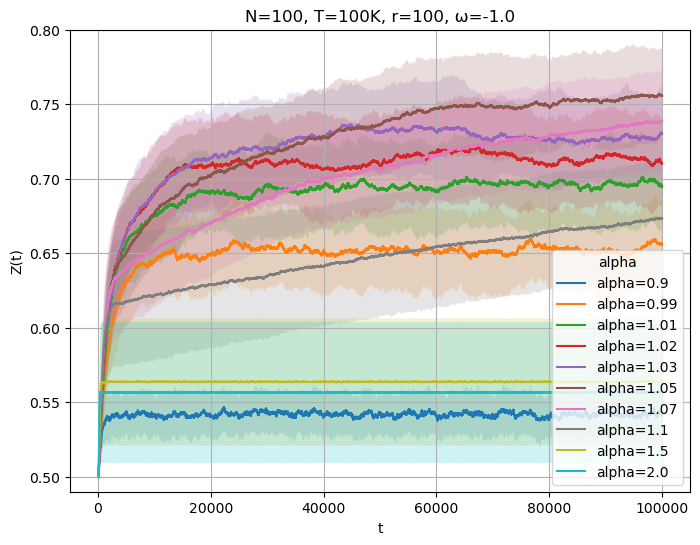

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns

# 平均値データフレームを "long format" に変換
mean_long = pd.melt(mean_df, id_vars=['t'], var_name='alpha', value_name='Z(t)')

# lineplot を作成（平均値）
plt.figure(figsize=(8, 6))
sns.lineplot(data=mean_long, x='t', y='Z(t)', hue='alpha', palette="tab10")

# 標準偏差の帯を追加
for column in mean_df.columns[1:]:
    alpha = column
    subset_mean = mean_df[['t', alpha]]
    subset_std = std_df[['t', alpha]]
    plt.fill_between(subset_mean['t'], subset_mean[alpha] - subset_std[alpha], subset_mean[alpha] + subset_std[alpha], alpha=0.2)

plt.title("N=100, T=100K, r=100, ω=-1.0")
plt.grid()
plt.ylim(0.49, 0.8)
plt.show()


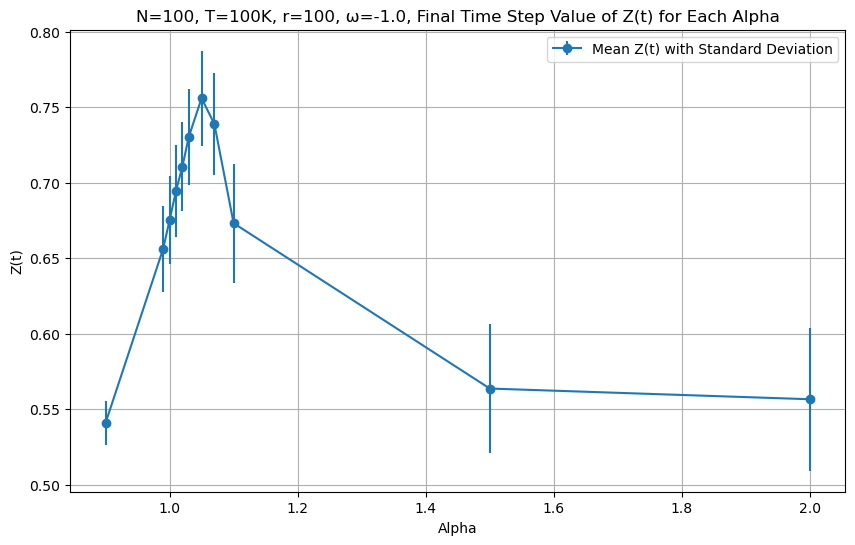

In [42]:
import pandas as pd

alpha09 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha0.9.csv")
alpha099 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha0.99.csv")
alpha1 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.0.csv")
alpha101 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.01.csv")
alpha102 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.02.csv")
alpha103 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.03.csv")
alpha105 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.05.csv")
alpha107 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.07.csv")
alpha11 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.1.csv")
alpha15 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.5.csv")
alpha2 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha2.0.csv")

# 各データセットから最後の時刻の平均値と標準偏差を抽出
data = {
    'Alpha': [0.9, 0.99, 1.0, 1.01, 1.02, 1.03, 1.05, 1.07, 1.1, 1.5, 2.0],
    'Mean_Z(t)': [df['Z'].iloc[-1] for df in [alpha09, alpha099, alpha1, alpha101, alpha102, alpha103, alpha105, alpha107, alpha11, alpha15, alpha2]],
    'Std_Z(t)': [df['std'].iloc[-1] for df in [alpha09, alpha099, alpha1, alpha101, alpha102, alpha103, alpha105, alpha107, alpha11, alpha15, alpha2]]
}

# 新しいデータフレームを作成
plot_df_w_1 = pd.DataFrame(data)

# プロット作成
plt.figure(figsize=(10, 6))
plt.errorbar(plot_df_w_1['Alpha'], plot_df_w_1['Mean_Z(t)'], yerr=plot_df_w_1['Std_Z(t)'], fmt='o-', label='Mean Z(t) with Standard Deviation')
plt.title("N=100, T=100K, r=100, ω=-1.0, Final Time Step Value of Z(t) for Each Alpha")
plt.xlabel('Alpha')
plt.ylabel('Z(t)')
plt.grid()
plt.legend()
plt.show()


In [9]:
alpha_list = [0.0, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 2.0]
T = 10000 # 10K
omega = -0.99

for alpha in alpha_list:
    command = f"julia ../src/sampling/main.jl --T {T} --omega {omega} --alpha {alpha}"
    os.system(command)


Running simulation with the following parameters:
N = 100, T = 10K, r = 100, omega = -0.99, alpha = 0.0, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:14:10:49


Finished simulation
Saved Z values to data/Zt/N100_T10K_r100_omega-0.99_alpha0.0.csv
Running simulation with the following parameters:
N = 100, T = 10K, r = 100, omega = -0.99, alpha = 0.2, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:16:22:02


Finished simulation
Saved Z values to data/Zt/N100_T10K_r100_omega-0.99_alpha0.2.csv
Running simulation with the following parameters:
N = 100, T = 10K, r = 100, omega = -0.99, alpha = 0.4, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:16:30:18


Finished simulation
Saved Z values to data/Zt/N100_T10K_r100_omega-0.99_alpha0.4.csv
Running simulation with the following parameters:
N = 100, T = 10K, r = 100, omega = -0.99, alpha = 0.5, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:16:04:51


Finished simulation
Saved Z values to data/Zt/N100_T10K_r100_omega-0.99_alpha0.5.csv
Running simulation with the following parameters:
N = 100, T = 10K, r = 100, omega = -0.99, alpha = 0.6, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:17:14:15


Finished simulation
Saved Z values to data/Zt/N100_T10K_r100_omega-0.99_alpha0.6.csv
Running simulation with the following parameters:
N = 100, T = 10K, r = 100, omega = -0.99, alpha = 0.7, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:16:23:11


Finished simulation
Saved Z values to data/Zt/N100_T10K_r100_omega-0.99_alpha0.7.csv
Running simulation with the following parameters:
N = 100, T = 10K, r = 100, omega = -0.99, alpha = 0.8, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:17:19:25


Finished simulation
Saved Z values to data/Zt/N100_T10K_r100_omega-0.99_alpha0.8.csv
Running simulation with the following parameters:
N = 100, T = 10K, r = 100, omega = -0.99, alpha = 0.9, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:16:49:08


Finished simulation
Saved Z values to data/Zt/N100_T10K_r100_omega-0.99_alpha0.9.csv
Running simulation with the following parameters:
N = 100, T = 10K, r = 100, omega = -0.99, alpha = 1.1, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:15:43:04


Finished simulation
Saved Z values to data/Zt/N100_T10K_r100_omega-0.99_alpha1.1.csv
Running simulation with the following parameters:
N = 100, T = 10K, r = 100, omega = -0.99, alpha = 1.2, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:14:08:19


Finished simulation
Saved Z values to data/Zt/N100_T10K_r100_omega-0.99_alpha1.2.csv
Running simulation with the following parameters:
N = 100, T = 10K, r = 100, omega = -0.99, alpha = 1.3, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:15:01:28


Finished simulation
Saved Z values to data/Zt/N100_T10K_r100_omega-0.99_alpha1.3.csv
Running simulation with the following parameters:
N = 100, T = 10K, r = 100, omega = -0.99, alpha = 1.4, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:15:08:52


Finished simulation
Saved Z values to data/Zt/N100_T10K_r100_omega-0.99_alpha1.4.csv
Running simulation with the following parameters:
N = 100, T = 10K, r = 100, omega = -0.99, alpha = 1.5, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:16:56:09


Finished simulation
Saved Z values to data/Zt/N100_T10K_r100_omega-0.99_alpha1.5.csv
Running simulation with the following parameters:
N = 100, T = 10K, r = 100, omega = -0.99, alpha = 1.6, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:15:26:42


Finished simulation
Saved Z values to data/Zt/N100_T10K_r100_omega-0.99_alpha1.6.csv
Running simulation with the following parameters:
N = 100, T = 10K, r = 100, omega = -0.99, alpha = 1.8, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:15:16:26


Finished simulation
Saved Z values to data/Zt/N100_T10K_r100_omega-0.99_alpha1.8.csv
Running simulation with the following parameters:
N = 100, T = 10K, r = 100, omega = -0.99, alpha = 2.0, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:15:45:40


Finished simulation
Saved Z values to data/Zt/N100_T10K_r100_omega-0.99_alpha2.0.csv


In [16]:
alpha_list = [1.04, 1.06, 1.08]
T = 100000 # 100K
omega = -0.99

for alpha in alpha_list:
    command = f"julia ../src/sampling/main.jl --T {T} --omega {omega} --alpha {alpha}"
    os.system(command)


Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = -0.99, alpha = 1.04, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:45:28ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega-0.99_alpha1.04.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = -0.99, alpha = 1.06, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:45:27ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega-0.99_alpha1.06.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = -0.99, alpha = 1.08, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:45:30ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega-0.99_alpha1.08.csv


In [17]:
alpha_list = [0.92, 0.94, 0.96, 0.98]
T = 100000 # 50K
omega = -0.99

for alpha in alpha_list:
    command = f"julia ../src/sampling/main.jl --T {T} --omega {omega} --alpha {alpha}"
    os.system(command)


Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = -0.99, alpha = 0.92, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:45:25ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega-0.99_alpha0.92.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = -0.99, alpha = 0.94, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:45:21ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega-0.99_alpha0.94.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = -0.99, alpha = 0.96, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:46:36ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega-0.99_alpha0.96.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = -0.99, alpha = 0.98, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:45:31ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega-0.99_alpha0.98.csv


In [36]:
alpha_list = [1.5]
T = 10000 # 50K
omega = -0.99

for alpha in alpha_list:
    command = f"julia ../src/sampling/main.jl --T {T} --omega {omega} --alpha {alpha}"
    os.system(command)


Running simulation with the following parameters:
N = 100, T = 10K, r = 100, omega = -0.99, alpha = 1.5, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:01:15:26:49


Finished simulation
Saved Z values to data/Zt/N100_T10K_r100_omega-0.99_alpha1.5.csv


In [34]:
alpha09 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.99_alpha0.9.csv")
alpha099 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.99_alpha0.99.csv")
# alpha1 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.99_alpha1.0.csv")
alpha101 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.99_alpha1.01.csv")
alpha102 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.99_alpha1.02.csv")
alpha103 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.99_alpha1.03.csv")
alpha11 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.99_alpha1.1.csv")
# alpha15 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.99_alpha1.5.csv")
alpha2 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.99_alpha2.0.csv")

columns = ["t", "alpha=0.9", "alpha=0.99", "alpha=1.01", "alpha=1.02", "alpha=1.03", "alpha=1.1", "alpha=2.0"]

# データフレームの結合
# 平均値のためのデータフレーム
mean_df = pd.concat([alpha09['t'], alpha09['Z'], alpha099['Z'], alpha101['Z'], alpha102['Z'], alpha103['Z'], alpha11['Z'], alpha2['Z']], axis=1)
mean_df = mean_df[mean_df['t'] > 100]
mean_df.columns = columns

# display(mean_df)

# 標準偏差のためのデータフレーム
std_df = pd.concat([alpha09['t'], alpha09['std'], alpha099['std'], alpha101['std'], alpha102['std'], alpha103['std'], alpha11['std'], alpha2['std']], axis=1)
std_df = std_df[std_df['t'] > 100]
std_df.columns = columns

# display(std_df)


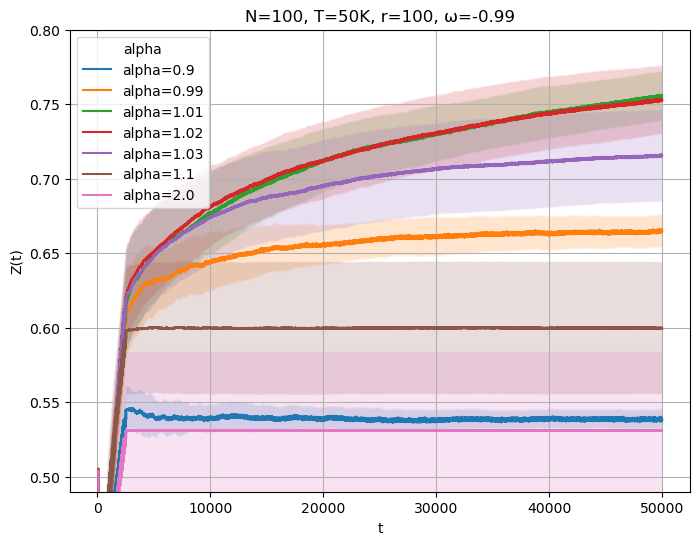

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns

# 平均値データフレームを "long format" に変換
mean_long = pd.melt(mean_df, id_vars=['t'], var_name='alpha', value_name='Z(t)')

# lineplot を作成（平均値）
plt.figure(figsize=(8, 6))
sns.lineplot(data=mean_long, x='t', y='Z(t)', hue='alpha', palette="tab10")

# 標準偏差の帯を追加
for column in mean_df.columns[1:]:
    alpha = column
    subset_mean = mean_df[['t', alpha]]
    subset_std = std_df[['t', alpha]]
    plt.fill_between(subset_mean['t'], subset_mean[alpha] - subset_std[alpha], subset_mean[alpha] + subset_std[alpha], alpha=0.2)

plt.title("N=100, T=50K, r=100, ω=-0.99")
plt.grid()
plt.ylim(0.49, 0.8)
plt.show()


In [3]:
alpha_list = [0.99, 1.0, 1.01, 1.02, 1.03]
T = 100000 # 100K
omega = -0.99

for alpha in alpha_list:
    command = f"julia ../src/sampling/main.jl --T {T} --omega {omega} --alpha {alpha}"
    os.system(command)


Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = -0.99, alpha = 0.99, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:45:31ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega-0.99_alpha0.99.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = -0.99, alpha = 1.0, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:45:28ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega-0.99_alpha1.0.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = -0.99, alpha = 1.01, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:46:42ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega-0.99_alpha1.01.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = -0.99, alpha = 1.02, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:46:03ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega-0.99_alpha1.02.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = -0.99, alpha = 1.03, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:46:29ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega-0.99_alpha1.03.csv


In [2]:
alpha_list = [0.99, 1.0, 1.01, 1.02, 1.03]
T = 1000000 # 100K
omega = -0.99

for alpha in alpha_list:
    command = f"julia ../src/sampling/main.jl --T {T} --omega {omega} --alpha {alpha} --sample 10"
    os.system(command)


Running simulation with the following parameters:
N = 100, T = 1M, r = 100, omega = -0.99, alpha = 0.99, samples = 10


Samples: 100%|██████████████████████████████████████████| Time: 7:10:47K9:28K


Finished simulation
Saved Z values to data/Zt/N100_T1M_r100_omega-0.99_alpha0.99.csv
Running simulation with the following parameters:
N = 100, T = 1M, r = 100, omega = -0.99, alpha = 1.0, samples = 10


Samples: 100%|██████████████████████████████████████████| Time: 7:12:16K0:45K


Finished simulation
Saved Z values to data/Zt/N100_T1M_r100_omega-0.99_alpha1.0.csv
Running simulation with the following parameters:
N = 100, T = 1M, r = 100, omega = -0.99, alpha = 1.01, samples = 10


Samples: 100%|██████████████████████████████████████████| Time: 7:01:26K6:05K


Finished simulation
Saved Z values to data/Zt/N100_T1M_r100_omega-0.99_alpha1.01.csv
Running simulation with the following parameters:
N = 100, T = 1M, r = 100, omega = -0.99, alpha = 1.02, samples = 10


Samples: 100%|██████████████████████████████████████████| Time: 7:13:40K4:19K


Finished simulation
Saved Z values to data/Zt/N100_T1M_r100_omega-0.99_alpha1.02.csv
Running simulation with the following parameters:
N = 100, T = 1M, r = 100, omega = -0.99, alpha = 1.03, samples = 10


Samples: 100%|██████████████████████████████████████████| Time: 7:02:54K1:08K


Finished simulation
Saved Z values to data/Zt/N100_T1M_r100_omega-0.99_alpha1.03.csv


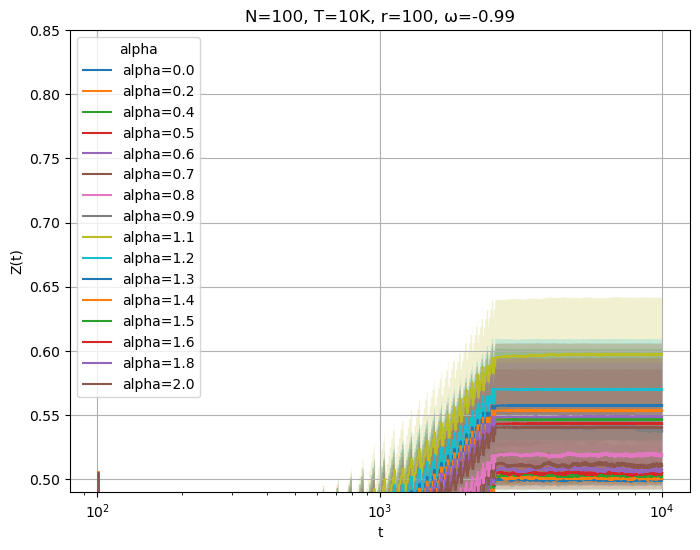

In [12]:
alpha0 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha0.0.csv")
alpha02 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha0.2.csv")
alpha04 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha0.4.csv")
alpha05 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha0.5.csv")
alpha06 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha0.6.csv")
alpha07 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha0.7.csv")
alpha08 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha0.8.csv")
alpha09 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha0.9.csv")
alpha11 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha1.1.csv")
alpha12 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha1.2.csv")
alpha13 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha1.3.csv")
alpha14 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha1.4.csv")
alpha15 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha1.5.csv")
alpha16 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha1.6.csv")
alpha18 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha1.8.csv")
alpha2 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha2.0.csv")

columns = ["t", "alpha=0.0", "alpha=0.2", "alpha=0.4", "alpha=0.5", "alpha=0.6", "alpha=0.7", "alpha=0.8", "alpha=0.9", "alpha=1.1", "alpha=1.2", "alpha=1.3", "alpha=1.4", "alpha=1.5", "alpha=1.6", "alpha=1.8", "alpha=2.0"]

# データフレームの結合
# 平均値のためのデータフレーム
mean_df = pd.concat([alpha0['t'], alpha0['Z'], alpha02['Z'], alpha04['Z'], alpha05['Z'], alpha06['Z'], alpha07['Z'], alpha08['Z'], alpha09['Z'], alpha11['Z'], alpha12['Z'], alpha13['Z'], alpha14['Z'], alpha15['Z'], alpha16['Z'], alpha18['Z'], alpha2['Z']], axis=1)
mean_df = mean_df[mean_df['t'] > 100]
mean_df.columns = columns

# display(mean_df)

# 標準偏差のためのデータフレーム
std_df = pd.concat([alpha0['t'], alpha0['std'], alpha02['std'], alpha04['std'], alpha05['std'], alpha06['std'], alpha07['std'], alpha08['std'], alpha09['std'], alpha11['std'], alpha12['std'], alpha13['std'], alpha14['std'], alpha15['std'], alpha16['std'], alpha18['std'], alpha2['std']], axis=1)
std_df = std_df[std_df['t'] > 100]
std_df.columns = columns

# display(std_df)

from matplotlib import pyplot as plt
import seaborn as sns

# 平均値データフレームを "long format" に変換
mean_long = pd.melt(mean_df, id_vars=['t'], var_name='alpha', value_name='Z(t)')

# lineplot を作成（平均値）
plt.figure(figsize=(8, 6))
sns.lineplot(data=mean_long, x='t', y='Z(t)', hue='alpha', palette="tab10")

# 標準偏差の帯を追加
for column in mean_df.columns[1:]:
    alpha = column
    subset_mean = mean_df[['t', alpha]]
    subset_std = std_df[['t', alpha]]
    plt.fill_between(subset_mean['t'], subset_mean[alpha] - subset_std[alpha], subset_mean[alpha] + subset_std[alpha], alpha=0.2)

plt.title("N=100, T=10K, r=100, ω=-0.99")
plt.grid()
plt.xscale('log')
plt.ylim(0.49, 0.85)
plt.show()


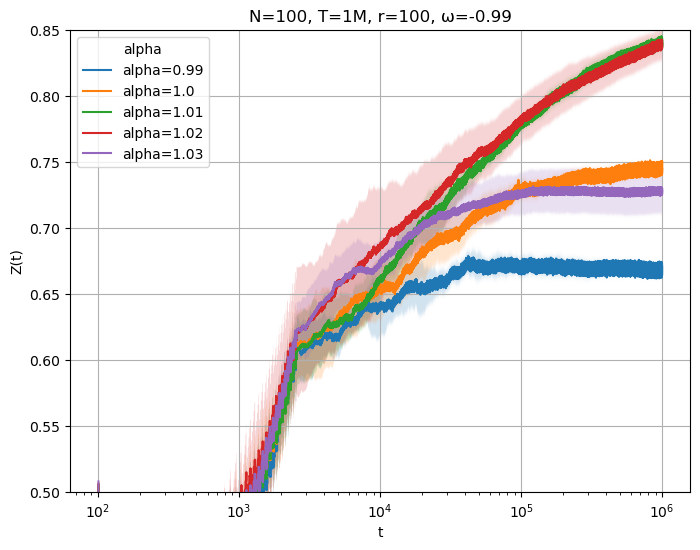

In [15]:
alpha099 = pd.read_csv("data/Zt/N100_T1M_r100_omega-0.99_alpha0.99.csv")
alpha1 = pd.read_csv("data/Zt/N100_T1M_r100_omega-0.99_alpha1.0.csv")
alpha101 = pd.read_csv("data/Zt/N100_T1M_r100_omega-0.99_alpha1.01.csv")
alpha102 = pd.read_csv("data/Zt/N100_T1M_r100_omega-0.99_alpha1.02.csv")
alpha103 = pd.read_csv("data/Zt/N100_T1M_r100_omega-0.99_alpha1.03.csv")

columns = ["t", "alpha=0.99", "alpha=1.0", "alpha=1.01", "alpha=1.02", "alpha=1.03"]

# データフレームの結合
# 平均値のためのデータフレーム
mean_df = pd.concat([alpha099['t'], alpha099['Z'], alpha1['Z'], alpha101['Z'], alpha102['Z'], alpha103['Z']], axis=1)
mean_df = mean_df[mean_df['t'] > 100]
mean_df.columns = columns

# display(mean_df)

# 標準偏差のためのデータフレーム
std_df = pd.concat([alpha099['t'], alpha099['std'], alpha1['std'], alpha101['std'], alpha102['std'], alpha103['std']], axis=1)
std_df = std_df[std_df['t'] > 100]
std_df.columns = columns

# display(std_df)

from matplotlib import pyplot as plt
import seaborn as sns

# 平均値データフレームを "long format" に変換
mean_long = pd.melt(mean_df, id_vars=['t'], var_name='alpha', value_name='Z(t)')

# lineplot を作成（平均値）
plt.figure(figsize=(8, 6))
sns.lineplot(data=mean_long, x='t', y='Z(t)', hue='alpha', palette="tab10")

# 標準偏差の帯を追加
for column in mean_df.columns[1:]:
    alpha = column
    subset_mean = mean_df[['t', alpha]]
    subset_std = std_df[['t', alpha]]
    plt.fill_between(subset_mean['t'], subset_mean[alpha] - subset_std[alpha], subset_mean[alpha] + subset_std[alpha], alpha=0.2)

plt.title("N=100, T=1M, r=100, ω=-0.99")
plt.grid()
plt.xscale('log')
plt.ylim(0.5, 0.85)
plt.show()


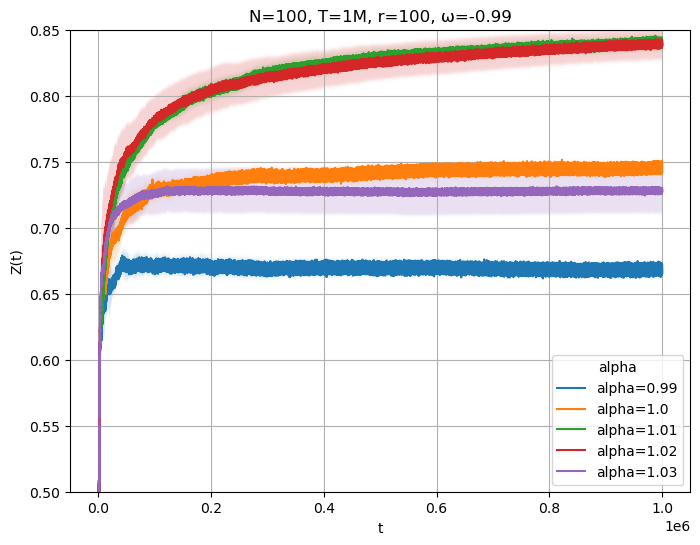

In [18]:
alpha099 = pd.read_csv("data/Zt/N100_T1M_r100_omega-0.99_alpha0.99.csv")
alpha1 = pd.read_csv("data/Zt/N100_T1M_r100_omega-0.99_alpha1.0.csv")
alpha101 = pd.read_csv("data/Zt/N100_T1M_r100_omega-0.99_alpha1.01.csv")
alpha102 = pd.read_csv("data/Zt/N100_T1M_r100_omega-0.99_alpha1.02.csv")
alpha103 = pd.read_csv("data/Zt/N100_T1M_r100_omega-0.99_alpha1.03.csv")

columns = ["t", "alpha=0.99", "alpha=1.0", "alpha=1.01", "alpha=1.02", "alpha=1.03"]

# データフレームの結合
# 平均値のためのデータフレーム
mean_df = pd.concat([alpha099['t'], alpha099['Z'], alpha1['Z'], alpha101['Z'], alpha102['Z'], alpha103['Z']], axis=1)
mean_df = mean_df[mean_df['t'] > 100]
mean_df.columns = columns

# display(mean_df)

# 標準偏差のためのデータフレーム
std_df = pd.concat([alpha099['t'], alpha099['std'], alpha1['std'], alpha101['std'], alpha102['std'], alpha103['std']], axis=1)
std_df = std_df[std_df['t'] > 100]
std_df.columns = columns

# display(std_df)

from matplotlib import pyplot as plt
import seaborn as sns

# 平均値データフレームを "long format" に変換
mean_long = pd.melt(mean_df, id_vars=['t'], var_name='alpha', value_name='Z(t)')

# lineplot を作成（平均値）
plt.figure(figsize=(8, 6))
sns.lineplot(data=mean_long, x='t', y='Z(t)', hue='alpha', palette="tab10")

# 標準偏差の帯を追加
for column in mean_df.columns[1:]:
    alpha = column
    subset_mean = mean_df[['t', alpha]]
    subset_std = std_df[['t', alpha]]
    plt.fill_between(subset_mean['t'], subset_mean[alpha] - subset_std[alpha], subset_mean[alpha] + subset_std[alpha], alpha=0.2)

plt.title("N=100, T=1M, r=100, ω=-0.99")
plt.grid()
# plt.xscale('log')
plt.ylim(0.5, 0.85)
plt.show()


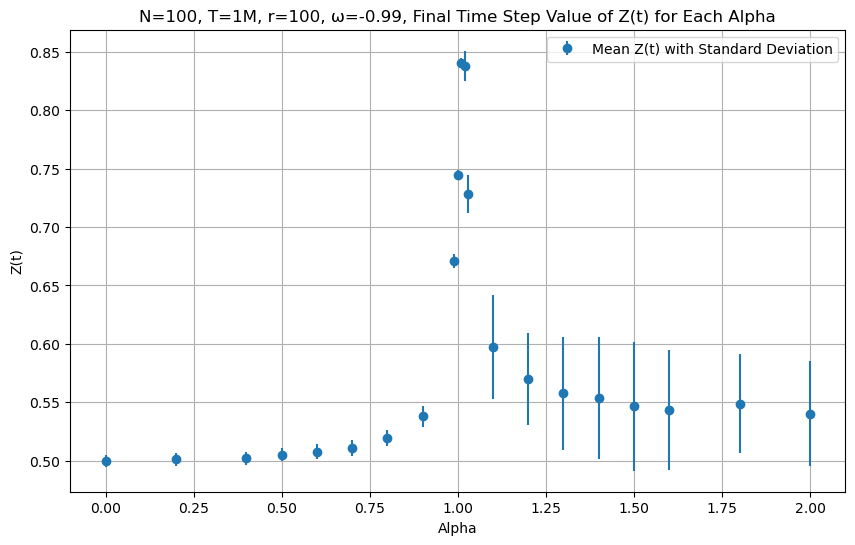

In [14]:
# alpha09 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.99_alpha0.9.csv")
# alpha099 = pd.read_csv("data/Zt/N100_T100K_r100_omega-0.99_alpha0.99.csv")
# # alpha1 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.99_alpha1.0.csv")
# alpha101 = pd.read_csv("data/Zt/N100_T100K_r100_omega-0.99_alpha1.01.csv")
# alpha102 = pd.read_csv("data/Zt/N100_T100K_r100_omega-0.99_alpha1.02.csv")
# alpha103 = pd.read_csv("data/Zt/N100_T100K_r100_omega-0.99_alpha1.03.csv")
# alpha11 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.99_alpha1.1.csv")
# alpha15 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha1.5.csv")
# alpha2 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.99_alpha2.0.csv")

# 各データセットから最後の時刻の平均値と標準偏差を抽出
data = {
    'Alpha': [0.0, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 1.0, 1.01, 1.02, 1.03, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.8, 2.0],
    'Mean_Z(t)': [df['Z'].iloc[-1] for df in [alpha0, alpha02, alpha04, alpha05, alpha06, alpha07, alpha08, alpha09, alpha099, alpha1, alpha101, alpha102, alpha103, alpha11, alpha12, alpha13, alpha14, alpha15, alpha16, alpha18, alpha2]],
    'Std_Z(t)': [df['std'].iloc[-1] for df in [alpha0, alpha02, alpha04, alpha05, alpha06, alpha07, alpha08, alpha09, alpha099, alpha1, alpha101, alpha102, alpha103, alpha11, alpha12, alpha13, alpha14, alpha15, alpha16, alpha18, alpha2]]
}

# 新しいデータフレームを作成
plot_df_w_099 = pd.DataFrame(data)

# プロット作成
plt.figure(figsize=(10, 6))
plt.errorbar(plot_df_w_099['Alpha'], plot_df_w_099['Mean_Z(t)'], yerr=plot_df_w_099['Std_Z(t)'], fmt='o', label='Mean Z(t) with Standard Deviation')
plt.title("N=100, T=1M, r=100, ω=-0.99, Final Time Step Value of Z(t) for Each Alpha")
plt.xlabel('Alpha')
plt.ylabel('Z(t)')
plt.grid()
plt.legend()
plt.show()


In [4]:
alpha_list = [0.99, 1.0, 1.01, 1.02, 1.03]
T = 100000 # 100K
omega = -0.9

for alpha in alpha_list:
    command = f"julia ../src/sampling/main.jl --T {T} --omega {omega} --alpha {alpha}"
    os.system(command)


Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = -0.9, alpha = 0.99, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:49:12ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega-0.9_alpha0.99.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = -0.9, alpha = 1.0, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:49:37ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega-0.9_alpha1.0.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = -0.9, alpha = 1.01, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:49:46ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega-0.9_alpha1.01.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = -0.9, alpha = 1.02, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:50:58ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega-0.9_alpha1.02.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = -0.9, alpha = 1.03, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:49:22ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega-0.9_alpha1.03.csv


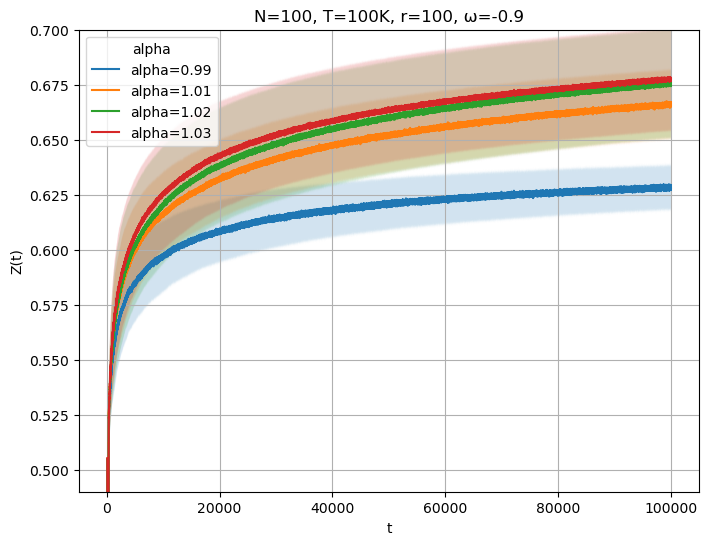

In [ ]:
alpha099 = pd.read_csv("data/Zt/N100_T100K_r100_omega-0.9_alpha0.99.csv")
alpha1 = pd.read_csv("data/Zt/N100_T100K_r100_omega-0.9_alpha1.0.csv")
alpha101 = pd.read_csv("data/Zt/N100_T100K_r100_omega-0.9_alpha1.01.csv")
alpha102 = pd.read_csv("data/Zt/N100_T100K_r100_omega-0.9_alpha1.02.csv")
alpha103 = pd.read_csv("data/Zt/N100_T100K_r100_omega-0.9_alpha1.03.csv")

columns = ["t", "alpha=0.99", "alpha=1.01", "alpha=1.02", "alpha=1.03"]

# データフレームの結合
# 平均値のためのデータフレーム
mean_df = pd.concat([alpha099['t'], alpha099['Z'], alpha101['Z'], alpha102['Z'], alpha103['Z']], axis=1)
mean_df = mean_df[mean_df['t'] > 100]
mean_df.columns = columns

# display(mean_df)

# 標準偏差のためのデータフレーム
std_df = pd.concat([alpha099['t'], alpha099['std'], alpha101['std'], alpha102['std'], alpha103['std']], axis=1)
std_df = std_df[std_df['t'] > 100]
std_df.columns = columns

# display(std_df)

from matplotlib import pyplot as plt
import seaborn as sns

# 平均値データフレームを "long format" に変換
mean_long = pd.melt(mean_df, id_vars=['t'], var_name='alpha', value_name='Z(t)')

# lineplot を作成（平均値）
plt.figure(figsize=(8, 6))
sns.lineplot(data=mean_long, x='t', y='Z(t)', hue='alpha', palette="tab10")

# 標準偏差の帯を追加
for column in mean_df.columns[1:]:
    alpha = column
    subset_mean = mean_df[['t', alpha]]
    subset_std = std_df[['t', alpha]]
    plt.fill_between(subset_mean['t'], subset_mean[alpha] - subset_std[alpha], subset_mean[alpha] + subset_std[alpha], alpha=0.2)

plt.title("N=100, T=100K, r=100, ω=-0.9")
plt.grid()
plt.ylim(0.49, 0.7)
plt.show()


In [39]:
alpha_list = [0.9, 1.1, 1.5, 2.0]
T = 50000 # 50K
omega = -0.9

for alpha in alpha_list:
    command = f"julia ../src/sampling/main.jl --T {T} --omega {omega} --alpha {alpha}"
    os.system(command)


Running simulation with the following parameters:
N = 100, T = 50K, r = 100, omega = -0.9, alpha = 0.9, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:16:32s


Finished simulation
Saved Z values to data/Zt/N100_T50K_r100_omega-0.9_alpha0.9.csv
Running simulation with the following parameters:
N = 100, T = 50K, r = 100, omega = -0.9, alpha = 1.1, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:16:34s


Finished simulation
Saved Z values to data/Zt/N100_T50K_r100_omega-0.9_alpha1.1.csv
Running simulation with the following parameters:
N = 100, T = 50K, r = 100, omega = -0.9, alpha = 1.5, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:16:40s


Finished simulation
Saved Z values to data/Zt/N100_T50K_r100_omega-0.9_alpha1.5.csv
Running simulation with the following parameters:
N = 100, T = 50K, r = 100, omega = -0.9, alpha = 2.0, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:16:25s


Finished simulation
Saved Z values to data/Zt/N100_T50K_r100_omega-0.9_alpha2.0.csv


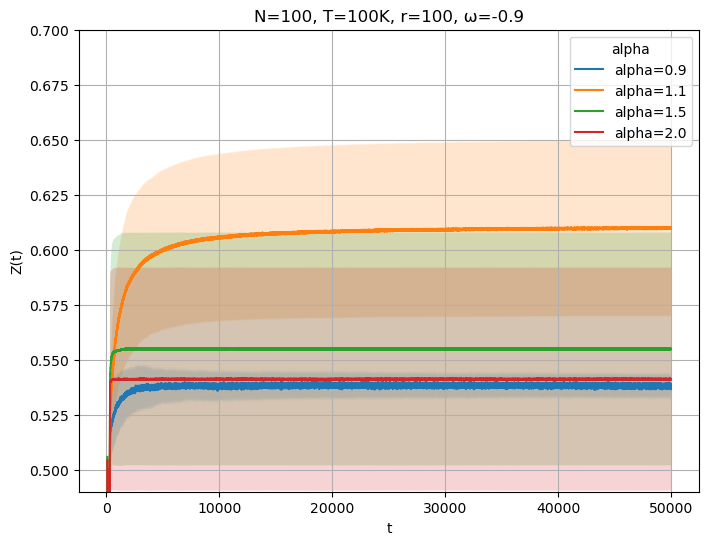

In [40]:
alpha09 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.9_alpha0.9.csv")
alpha11 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.9_alpha1.1.csv")
alpha15 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.9_alpha1.5.csv")
alpha2 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.9_alpha2.0.csv")

columns = ["t", "alpha=0.9", "alpha=1.1", "alpha=1.5", "alpha=2.0"]

# データフレームの結合
# 平均値のためのデータフレーム
mean_df = pd.concat([alpha09['t'], alpha09['Z'], alpha11['Z'], alpha15['Z'], alpha2['Z']], axis=1)
mean_df = mean_df[mean_df['t'] > 100]
mean_df.columns = columns

# display(mean_df)

# 標準偏差のためのデータフレーム
std_df = pd.concat([alpha09['t'], alpha09['std'], alpha11['std'], alpha15['std'], alpha2['std']], axis=1)
std_df = std_df[std_df['t'] > 100]
std_df.columns = columns

# display(std_df)

from matplotlib import pyplot as plt
import seaborn as sns

# 平均値データフレームを "long format" に変換
mean_long = pd.melt(mean_df, id_vars=['t'], var_name='alpha', value_name='Z(t)')

# lineplot を作成（平均値）
plt.figure(figsize=(8, 6))
sns.lineplot(data=mean_long, x='t', y='Z(t)', hue='alpha', palette="tab10")

# 標準偏差の帯を追加
for column in mean_df.columns[1:]:
    alpha = column
    subset_mean = mean_df[['t', alpha]]
    subset_std = std_df[['t', alpha]]
    plt.fill_between(subset_mean['t'], subset_mean[alpha] - subset_std[alpha], subset_mean[alpha] + subset_std[alpha], alpha=0.2)

plt.title("N=100, T=100K, r=100, ω=-0.9")
plt.grid()
plt.ylim(0.49, 0.7)
plt.show()


In [5]:
alpha_list = [0.99, 1.0, 1.01, 1.02, 1.03]
T = 100000 # 100K
omega = 0.0

for alpha in alpha_list:
    command = f"julia ../src/sampling/main.jl --T {T} --omega {omega} --alpha {alpha}"
    os.system(command)


Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = 0.0, alpha = 0.99, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:54:20ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega0.0_alpha0.99.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = 0.0, alpha = 1.0, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:54:33ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega0.0_alpha1.0.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = 0.0, alpha = 1.01, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:54:31ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega0.0_alpha1.01.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = 0.0, alpha = 1.02, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:53:30ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega0.0_alpha1.02.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = 0.0, alpha = 1.03, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:53:27ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega0.0_alpha1.03.csv


In [46]:
alpha_list = [0.9, 1.1, 1.5, 2.0]
T = 50000 # 50K
omega = 0.0

for alpha in alpha_list:
    command = f"julia ../src/sampling/main.jl --T {T} --omega {omega} --alpha {alpha}"
    os.system(command)


Running simulation with the following parameters:
N = 100, T = 50K, r = 100, omega = 0.0, alpha = 0.9, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:15:54s


Finished simulation
Saved Z values to data/Zt/N100_T50K_r100_omega0.0_alpha0.9.csv
Running simulation with the following parameters:
N = 100, T = 50K, r = 100, omega = 0.0, alpha = 1.1, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:15:52s


Finished simulation
Saved Z values to data/Zt/N100_T50K_r100_omega0.0_alpha1.1.csv
Running simulation with the following parameters:
N = 100, T = 50K, r = 100, omega = 0.0, alpha = 1.5, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:15:53s


Finished simulation
Saved Z values to data/Zt/N100_T50K_r100_omega0.0_alpha1.5.csv
Running simulation with the following parameters:
N = 100, T = 50K, r = 100, omega = 0.0, alpha = 2.0, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:15:47s


Finished simulation
Saved Z values to data/Zt/N100_T50K_r100_omega0.0_alpha2.0.csv


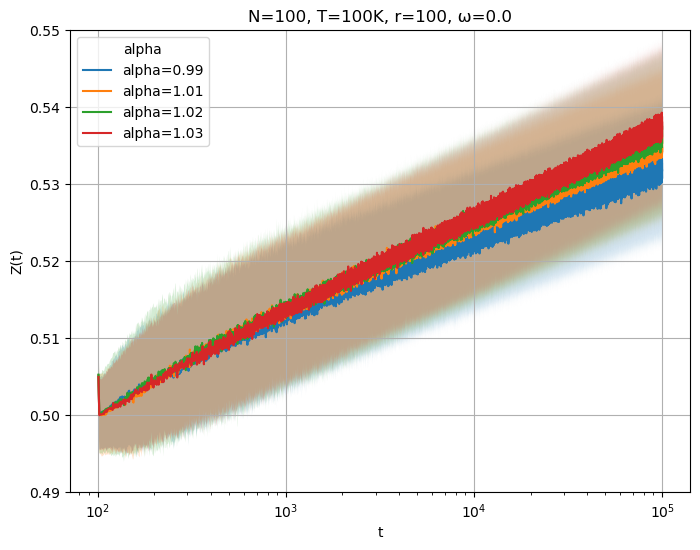

In [19]:
alpha099 = pd.read_csv("data/Zt/N100_T100K_r100_omega0.0_alpha0.99.csv")
alpha1 = pd.read_csv("data/Zt/N100_T100K_r100_omega0.0_alpha1.0.csv")
alpha101 = pd.read_csv("data/Zt/N100_T100K_r100_omega0.0_alpha1.01.csv")
alpha102 = pd.read_csv("data/Zt/N100_T100K_r100_omega0.0_alpha1.02.csv")
alpha103 = pd.read_csv("data/Zt/N100_T100K_r100_omega0.0_alpha1.03.csv")

columns = ["t", "alpha=0.99", "alpha=1.01", "alpha=1.02", "alpha=1.03"]

# データフレームの結合
# 平均値のためのデータフレーム
mean_df = pd.concat([alpha099['t'], alpha099['Z'], alpha101['Z'], alpha102['Z'], alpha103['Z']], axis=1)
mean_df = mean_df[mean_df['t'] > 100]
mean_df.columns = columns

# display(mean_df)

# 標準偏差のためのデータフレーム
std_df = pd.concat([alpha099['t'], alpha099['std'], alpha101['std'], alpha102['std'], alpha103['std']], axis=1)
std_df = std_df[std_df['t'] > 100]
std_df.columns = columns

# display(std_df)

from matplotlib import pyplot as plt
import seaborn as sns

# 平均値データフレームを "long format" に変換
mean_long = pd.melt(mean_df, id_vars=['t'], var_name='alpha', value_name='Z(t)')

# lineplot を作成（平均値）
plt.figure(figsize=(8, 6))
sns.lineplot(data=mean_long, x='t', y='Z(t)', hue='alpha', palette="tab10")

# 標準偏差の帯を追加
for column in mean_df.columns[1:]:
    alpha = column
    subset_mean = mean_df[['t', alpha]]
    subset_std = std_df[['t', alpha]]
    plt.fill_between(subset_mean['t'], subset_mean[alpha] - subset_std[alpha], subset_mean[alpha] + subset_std[alpha], alpha=0.2)

plt.title("N=100, T=100K, r=100, ω=0.0")
plt.grid()
plt.xscale('log')
plt.ylim(0.49, 0.55)
plt.show()


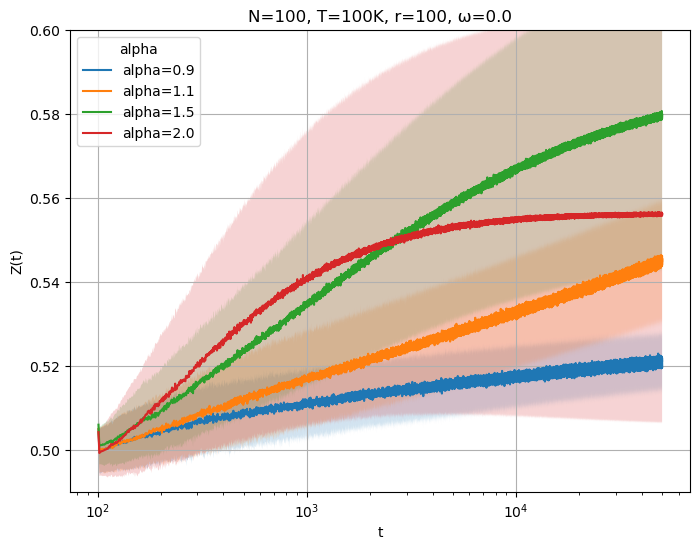

In [21]:
alpha09 = pd.read_csv("data/Zt/N100_T50K_r100_omega0.0_alpha0.9.csv")
alpha11 = pd.read_csv("data/Zt/N100_T50K_r100_omega0.0_alpha1.1.csv")
alpha15 = pd.read_csv("data/Zt/N100_T50K_r100_omega0.0_alpha1.5.csv")
alpha2 = pd.read_csv("data/Zt/N100_T50K_r100_omega0.0_alpha2.0.csv")

columns = ["t", "alpha=0.9", "alpha=1.1", "alpha=1.5", "alpha=2.0"]

# データフレームの結合
# 平均値のためのデータフレーム
mean_df = pd.concat([alpha09['t'], alpha09['Z'], alpha11['Z'], alpha15['Z'], alpha2['Z']], axis=1)
mean_df = mean_df[mean_df['t'] > 100]
mean_df.columns = columns

# display(mean_df)

# 標準偏差のためのデータフレーム
std_df = pd.concat([alpha09['t'], alpha09['std'], alpha11['std'], alpha15['std'], alpha2['std']], axis=1)
std_df = std_df[std_df['t'] > 100]
std_df.columns = columns

# display(std_df)

from matplotlib import pyplot as plt
import seaborn as sns

# 平均値データフレームを "long format" に変換
mean_long = pd.melt(mean_df, id_vars=['t'], var_name='alpha', value_name='Z(t)')

# lineplot を作成（平均値）
plt.figure(figsize=(8, 6))
sns.lineplot(data=mean_long, x='t', y='Z(t)', hue='alpha', palette="tab10")

# 標準偏差の帯を追加
for column in mean_df.columns[1:]:
    alpha = column
    subset_mean = mean_df[['t', alpha]]
    subset_std = std_df[['t', alpha]]
    plt.fill_between(subset_mean['t'], subset_mean[alpha] - subset_std[alpha], subset_mean[alpha] + subset_std[alpha], alpha=0.2)

plt.title("N=100, T=100K, r=100, ω=0.0")
plt.grid()
plt.xscale('log')
plt.ylim(0.49, 0.60)
plt.show()


In [6]:
alpha_list = [0.99, 1.0, 1.01, 1.02, 1.03]
T = 100000 # 100K
omega = 1.0

for alpha in alpha_list:
    command = f"julia ../src/sampling/main.jl --T {T} --omega {omega} --alpha {alpha}"
    os.system(command)


Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = 1.0, alpha = 0.99, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:50:06ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega1.0_alpha0.99.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = 1.0, alpha = 1.0, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:50:40ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega1.0_alpha1.0.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = 1.0, alpha = 1.01, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:50:03ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega1.0_alpha1.01.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = 1.0, alpha = 1.02, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:50:17ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega1.0_alpha1.02.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = 1.0, alpha = 1.03, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:50:55ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega1.0_alpha1.03.csv


In [47]:
alpha_list = [0.9, 1.1, 1.5, 2.0]
T = 50000 # 50K
omega = 1.0

for alpha in alpha_list:
    command = f"julia ../src/sampling/main.jl --T {T} --omega {omega} --alpha {alpha}"
    os.system(command)


Running simulation with the following parameters:
N = 100, T = 50K, r = 100, omega = 1.0, alpha = 0.9, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:14:28s


Finished simulation
Saved Z values to data/Zt/N100_T50K_r100_omega1.0_alpha0.9.csv
Running simulation with the following parameters:
N = 100, T = 50K, r = 100, omega = 1.0, alpha = 1.1, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:14:28s


Finished simulation
Saved Z values to data/Zt/N100_T50K_r100_omega1.0_alpha1.1.csv
Running simulation with the following parameters:
N = 100, T = 50K, r = 100, omega = 1.0, alpha = 1.5, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:14:29s


Finished simulation
Saved Z values to data/Zt/N100_T50K_r100_omega1.0_alpha1.5.csv
Running simulation with the following parameters:
N = 100, T = 50K, r = 100, omega = 1.0, alpha = 2.0, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:14:21s


Finished simulation
Saved Z values to data/Zt/N100_T50K_r100_omega1.0_alpha2.0.csv


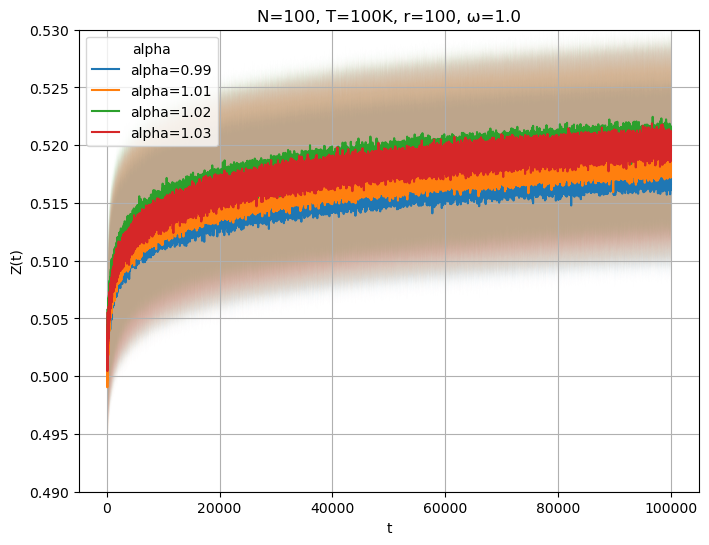

In [14]:
alpha099 = pd.read_csv("data/Zt/N100_T100K_r100_omega1.0_alpha0.99.csv")
alpha1 = pd.read_csv("data/Zt/N100_T100K_r100_omega1.0_alpha1.0.csv")
alpha101 = pd.read_csv("data/Zt/N100_T100K_r100_omega1.0_alpha1.01.csv")
alpha102 = pd.read_csv("data/Zt/N100_T100K_r100_omega1.0_alpha1.02.csv")
alpha103 = pd.read_csv("data/Zt/N100_T100K_r100_omega1.0_alpha1.03.csv")

columns = ["t", "alpha=0.99", "alpha=1.01", "alpha=1.02", "alpha=1.03"]

# データフレームの結合
# 平均値のためのデータフレーム
mean_df = pd.concat([alpha099['t'], alpha099['Z'], alpha101['Z'], alpha102['Z'], alpha103['Z']], axis=1)
mean_df = mean_df[mean_df['t'] > 100]
mean_df.columns = columns

# display(mean_df)

# 標準偏差のためのデータフレーム
std_df = pd.concat([alpha099['t'], alpha099['std'], alpha101['std'], alpha102['std'], alpha103['std']], axis=1)
std_df = std_df[std_df['t'] > 100]
std_df.columns = columns

# display(std_df)

from matplotlib import pyplot as plt
import seaborn as sns

# 平均値データフレームを "long format" に変換
mean_long = pd.melt(mean_df, id_vars=['t'], var_name='alpha', value_name='Z(t)')

# lineplot を作成（平均値）
plt.figure(figsize=(8, 6))
sns.lineplot(data=mean_long, x='t', y='Z(t)', hue='alpha', palette="tab10")

# 標準偏差の帯を追加
for column in mean_df.columns[1:]:
    alpha = column
    subset_mean = mean_df[['t', alpha]]
    subset_std = std_df[['t', alpha]]
    plt.fill_between(subset_mean['t'], subset_mean[alpha] - subset_std[alpha], subset_mean[alpha] + subset_std[alpha], alpha=0.2)

plt.title("N=100, T=100K, r=100, ω=1.0")
plt.grid()
plt.ylim(0.49, 0.53)
plt.show()


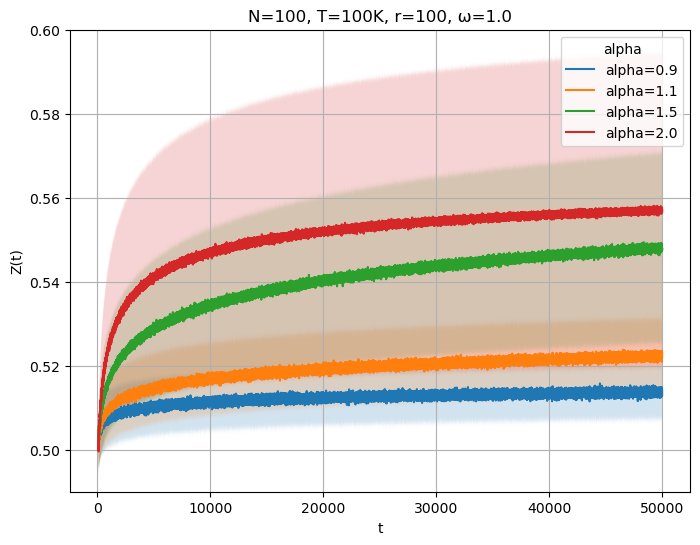

In [55]:
alpha09 = pd.read_csv("data/Zt/N100_T50K_r100_omega1.0_alpha0.9.csv")
alpha11 = pd.read_csv("data/Zt/N100_T50K_r100_omega1.0_alpha1.1.csv")
alpha15 = pd.read_csv("data/Zt/N100_T50K_r100_omega1.0_alpha1.5.csv")
alpha2 = pd.read_csv("data/Zt/N100_T50K_r100_omega1.0_alpha2.0.csv")

columns = ["t", "alpha=0.9", "alpha=1.1", "alpha=1.5", "alpha=2.0"]

# データフレームの結合
# 平均値のためのデータフレーム
mean_df = pd.concat([alpha09['t'], alpha09['Z'], alpha11['Z'], alpha15['Z'], alpha2['Z']], axis=1)
mean_df = mean_df[mean_df['t'] > 100]
mean_df.columns = columns

# display(mean_df)

# 標準偏差のためのデータフレーム
std_df = pd.concat([alpha09['t'], alpha09['std'], alpha11['std'], alpha15['std'], alpha2['std']], axis=1)
std_df = std_df[std_df['t'] > 100]
std_df.columns = columns

# display(std_df)

from matplotlib import pyplot as plt
import seaborn as sns

# 平均値データフレームを "long format" に変換
mean_long = pd.melt(mean_df, id_vars=['t'], var_name='alpha', value_name='Z(t)')

# lineplot を作成（平均値）
plt.figure(figsize=(8, 6))
sns.lineplot(data=mean_long, x='t', y='Z(t)', hue='alpha', palette="tab10")

# 標準偏差の帯を追加
for column in mean_df.columns[1:]:
    alpha = column
    subset_mean = mean_df[['t', alpha]]
    subset_std = std_df[['t', alpha]]
    plt.fill_between(subset_mean['t'], subset_mean[alpha] - subset_std[alpha], subset_mean[alpha] + subset_std[alpha], alpha=0.2)

plt.title("N=100, T=100K, r=100, ω=1.0")
plt.grid()
plt.ylim(0.49, 0.6)
plt.show()


In [56]:
alpha09 = pd.read_csv("data/Zt/N100_T50K_r100_omega1.0_alpha0.9.csv")
alpha099 = pd.read_csv("data/Zt/N100_T100K_r100_omega1.0_alpha0.99.csv")
alpha1 = pd.read_csv("data/Zt/N100_T100K_r100_omega1.0_alpha1.0.csv")
alpha101 = pd.read_csv("data/Zt/N100_T100K_r100_omega1.0_alpha1.01.csv")
alpha102 = pd.read_csv("data/Zt/N100_T100K_r100_omega1.0_alpha1.02.csv")
alpha103 = pd.read_csv("data/Zt/N100_T100K_r100_omega1.0_alpha1.03.csv")
alpha11 = pd.read_csv("data/Zt/N100_T50K_r100_omega1.0_alpha1.1.csv")
alpha15 = pd.read_csv("data/Zt/N100_T50K_r100_omega1.0_alpha1.5.csv")
alpha2 = pd.read_csv("data/Zt/N100_T50K_r100_omega1.0_alpha2.0.csv")

# 各データセットから最後の時刻の平均値と標準偏差を抽出
data = {
    'Alpha': [0.9, 0.99, 1.0, 1.01, 1.02, 1.03, 1.1, 1.5, 2.0],
    'Mean_Z(t)': [df['Z'].iloc[-1] for df in [alpha09, alpha099, alpha1, alpha101, alpha102, alpha103, alpha11, alpha15, alpha2]],
    'Std_Z(t)': [df['std'].iloc[-1] for df in [alpha09, alpha099, alpha1, alpha101, alpha102, alpha103, alpha11, alpha15, alpha2]]
}

# 新しいデータフレームを作成
plot_df_w1 = pd.DataFrame(data)


In [7]:
alpha_list = [0.99, 1.0, 1.01, 1.02, 1.03]
T = 100000 # 100K
omega = -0.5

for alpha in alpha_list:
    command = f"julia ../src/sampling/main.jl --T {T} --omega {omega} --alpha {alpha}"
    os.system(command)


Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = -0.5, alpha = 0.99, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:57:31ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega-0.5_alpha0.99.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = -0.5, alpha = 1.0, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:57:11ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega-0.5_alpha1.0.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = -0.5, alpha = 1.01, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:57:18ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega-0.5_alpha1.01.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = -0.5, alpha = 1.02, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:57:14ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega-0.5_alpha1.02.csv
Running simulation with the following parameters:
N = 100, T = 100K, r = 100, omega = -0.5, alpha = 1.03, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:57:06ys


Finished simulation
Saved Z values to data/Zt/N100_T100K_r100_omega-0.5_alpha1.03.csv


In [48]:
alpha_list = [0.9, 1.1, 1.5, 2.0]
T = 50000 # 50K
omega = -0.5

for alpha in alpha_list:
    command = f"julia ../src/sampling/main.jl --T {T} --omega {omega} --alpha {alpha}"
    os.system(command)


Running simulation with the following parameters:
N = 100, T = 50K, r = 100, omega = -0.5, alpha = 0.9, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:18:04s


Finished simulation
Saved Z values to data/Zt/N100_T50K_r100_omega-0.5_alpha0.9.csv
Running simulation with the following parameters:
N = 100, T = 50K, r = 100, omega = -0.5, alpha = 1.1, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:18:33s


Finished simulation
Saved Z values to data/Zt/N100_T50K_r100_omega-0.5_alpha1.1.csv
Running simulation with the following parameters:
N = 100, T = 50K, r = 100, omega = -0.5, alpha = 1.5, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:18:28s


Finished simulation
Saved Z values to data/Zt/N100_T50K_r100_omega-0.5_alpha1.5.csv
Running simulation with the following parameters:
N = 100, T = 50K, r = 100, omega = -0.5, alpha = 2.0, samples = 100


Samples: 100%|██████████████████████████████████████████| Time: 0:17:44s


Finished simulation
Saved Z values to data/Zt/N100_T50K_r100_omega-0.5_alpha2.0.csv


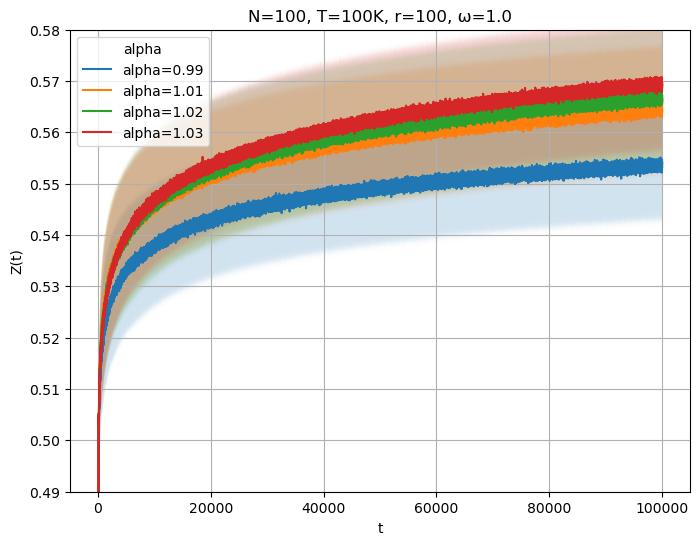

In [17]:
alpha099 = pd.read_csv("data/Zt/N100_T100K_r100_omega-0.5_alpha0.99.csv")
alpha1 = pd.read_csv("data/Zt/N100_T100K_r100_omega-0.5_alpha1.0.csv")
alpha101 = pd.read_csv("data/Zt/N100_T100K_r100_omega-0.5_alpha1.01.csv")
alpha102 = pd.read_csv("data/Zt/N100_T100K_r100_omega-0.5_alpha1.02.csv")
alpha103 = pd.read_csv("data/Zt/N100_T100K_r100_omega-0.5_alpha1.03.csv")

columns = ["t", "alpha=0.99", "alpha=1.01", "alpha=1.02", "alpha=1.03"]

# データフレームの結合
# 平均値のためのデータフレーム
mean_df = pd.concat([alpha099['t'], alpha099['Z'], alpha101['Z'], alpha102['Z'], alpha103['Z']], axis=1)
mean_df = mean_df[mean_df['t'] > 100]
mean_df.columns = columns

# display(mean_df)

# 標準偏差のためのデータフレーム
std_df = pd.concat([alpha099['t'], alpha099['std'], alpha101['std'], alpha102['std'], alpha103['std']], axis=1)
std_df = std_df[std_df['t'] > 100]
std_df.columns = columns

# display(std_df)

from matplotlib import pyplot as plt
import seaborn as sns

# 平均値データフレームを "long format" に変換
mean_long = pd.melt(mean_df, id_vars=['t'], var_name='alpha', value_name='Z(t)')

# lineplot を作成（平均値）
plt.figure(figsize=(8, 6))
sns.lineplot(data=mean_long, x='t', y='Z(t)', hue='alpha', palette="tab10")

# 標準偏差の帯を追加
for column in mean_df.columns[1:]:
    alpha = column
    subset_mean = mean_df[['t', alpha]]
    subset_std = std_df[['t', alpha]]
    plt.fill_between(subset_mean['t'], subset_mean[alpha] - subset_std[alpha], subset_mean[alpha] + subset_std[alpha], alpha=0.2)

plt.title("N=100, T=100K, r=100, ω=-0.5")
plt.grid()
plt.ylim(0.49, 0.58)
plt.show()


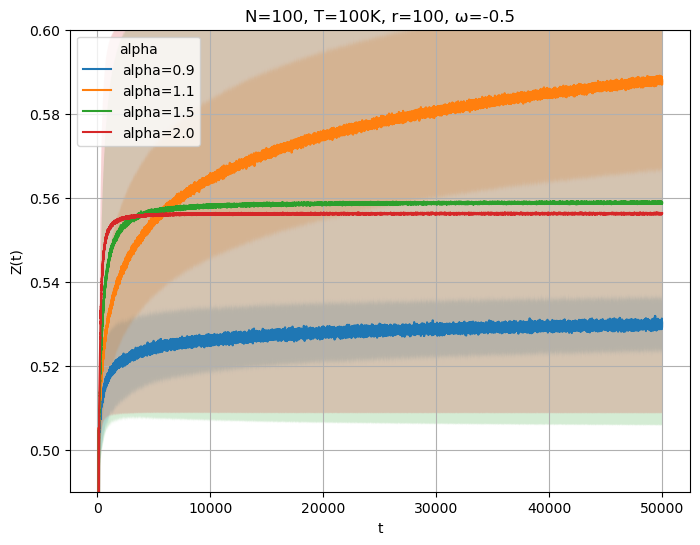

In [58]:
alpha09 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.5_alpha0.9.csv")
alpha11 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.5_alpha1.1.csv")
alpha15 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.5_alpha1.5.csv")
alpha2 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.5_alpha2.0.csv")

columns = ["t", "alpha=0.9", "alpha=1.1", "alpha=1.5", "alpha=2.0"]

# データフレームの結合
# 平均値のためのデータフレーム
mean_df = pd.concat([alpha09['t'], alpha09['Z'], alpha11['Z'], alpha15['Z'], alpha2['Z']], axis=1)
mean_df = mean_df[mean_df['t'] > 100]
mean_df.columns = columns

# display(mean_df)

# 標準偏差のためのデータフレーム
std_df = pd.concat([alpha09['t'], alpha09['std'], alpha11['std'], alpha15['std'], alpha2['std']], axis=1)
std_df = std_df[std_df['t'] > 100]
std_df.columns = columns

# display(std_df)

from matplotlib import pyplot as plt
import seaborn as sns

# 平均値データフレームを "long format" に変換
mean_long = pd.melt(mean_df, id_vars=['t'], var_name='alpha', value_name='Z(t)')

# lineplot を作成（平均値）
plt.figure(figsize=(8, 6))
sns.lineplot(data=mean_long, x='t', y='Z(t)', hue='alpha', palette="tab10")

# 標準偏差の帯を追加
for column in mean_df.columns[1:]:
    alpha = column
    subset_mean = mean_df[['t', alpha]]
    subset_std = std_df[['t', alpha]]
    plt.fill_between(subset_mean['t'], subset_mean[alpha] - subset_std[alpha], subset_mean[alpha] + subset_std[alpha], alpha=0.2)

plt.title("N=100, T=100K, r=100, ω=-0.5")
plt.grid()
plt.ylim(0.49, 0.6)
plt.show()


In [59]:
alpha09 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha0.9.csv")
alpha099 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha0.99.csv")
alpha1 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.0.csv")
alpha101 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.01.csv")
alpha102 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.02.csv")
alpha103 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.03.csv")
alpha105 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.05.csv")
alpha107 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.07.csv")
alpha11 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.1.csv")
alpha15 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha1.5.csv")
alpha2 = pd.read_csv("data/Zt/N100_T100K_r100_omega-1.0_alpha2.0.csv")

# 各データセットから最後の時刻の平均値と標準偏差を抽出
data = {
    'Alpha': [0.9, 0.99, 1.0, 1.01, 1.02, 1.03, 1.05, 1.07, 1.1, 1.5, 2.0],
    'Mean_Z(t)': [df['Z'].iloc[-1] for df in [alpha09, alpha099, alpha1, alpha101, alpha102, alpha103, alpha105, alpha107, alpha11, alpha15, alpha2]],
    'Std_Z(t)': [df['std'].iloc[-1] for df in [alpha09, alpha099, alpha1, alpha101, alpha102, alpha103, alpha105, alpha107, alpha11, alpha15, alpha2]]
}

# 新しいデータフレームを作成
plot_df_w_1 = pd.DataFrame(data)


In [60]:
alpha09 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.99_alpha0.9.csv")
alpha099 = pd.read_csv("data/Zt/N100_T100K_r100_omega-0.99_alpha0.99.csv")
# alpha1 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.99_alpha1.0.csv")
alpha101 = pd.read_csv("data/Zt/N100_T100K_r100_omega-0.99_alpha1.01.csv")
alpha102 = pd.read_csv("data/Zt/N100_T100K_r100_omega-0.99_alpha1.02.csv")
alpha103 = pd.read_csv("data/Zt/N100_T100K_r100_omega-0.99_alpha1.03.csv")
alpha11 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.99_alpha1.1.csv")
alpha15 = pd.read_csv("data/Zt/N100_T10K_r100_omega-0.99_alpha1.5.csv")
alpha2 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.99_alpha2.0.csv")

# 各データセットから最後の時刻の平均値と標準偏差を抽出
data = {
    'Alpha': [0.9, 0.99, 1.01, 1.02, 1.03, 1.1, 1.5, 2.0],
    'Mean_Z(t)': [df['Z'].iloc[-1] for df in [alpha09, alpha099, alpha101, alpha102, alpha103, alpha11, alpha15, alpha2]],
    'Std_Z(t)': [df['std'].iloc[-1] for df in [alpha09, alpha099, alpha101, alpha102, alpha103, alpha11, alpha15, alpha2]]
}

# 新しいデータフレームを作成
plot_df_w_099 = pd.DataFrame(data)


In [61]:
alpha09 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.5_alpha0.9.csv")
alpha099 = pd.read_csv("data/Zt/N100_T100K_r100_omega-0.5_alpha0.99.csv")
alpha1 = pd.read_csv("data/Zt/N100_T100K_r100_omega-0.5_alpha1.0.csv")
alpha101 = pd.read_csv("data/Zt/N100_T100K_r100_omega-0.5_alpha1.01.csv")
alpha102 = pd.read_csv("data/Zt/N100_T100K_r100_omega-0.5_alpha1.02.csv")
alpha103 = pd.read_csv("data/Zt/N100_T100K_r100_omega-0.5_alpha1.03.csv")
alpha11 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.5_alpha1.1.csv")
alpha15 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.5_alpha1.5.csv")
alpha2 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.5_alpha2.0.csv")

# 各データセットから最後の時刻の平均値と標準偏差を抽出
data = {
    'Alpha': [0.9, 0.99, 1.0, 1.01, 1.02, 1.03, 1.1, 1.5, 2.0],
    'Mean_Z(t)': [df['Z'].iloc[-1] for df in [alpha09, alpha099, alpha1, alpha101, alpha102, alpha103, alpha11, alpha15, alpha2]],
    'Std_Z(t)': [df['std'].iloc[-1] for df in [alpha09, alpha099, alpha1, alpha101, alpha102, alpha103, alpha11, alpha15, alpha2]]
}

# 新しいデータフレームを作成
plot_df_w_05 = pd.DataFrame(data)


In [62]:
alpha09 = pd.read_csv("data/Zt/N100_T50K_r100_omega0.0_alpha0.9.csv")
alpha099 = pd.read_csv("data/Zt/N100_T100K_r100_omega0.0_alpha0.99.csv")
alpha1 = pd.read_csv("data/Zt/N100_T100K_r100_omega0.0_alpha1.0.csv")
alpha101 = pd.read_csv("data/Zt/N100_T100K_r100_omega0.0_alpha1.01.csv")
alpha102 = pd.read_csv("data/Zt/N100_T100K_r100_omega0.0_alpha1.02.csv")
alpha103 = pd.read_csv("data/Zt/N100_T100K_r100_omega0.0_alpha1.03.csv")
alpha11 = pd.read_csv("data/Zt/N100_T50K_r100_omega0.0_alpha1.1.csv")
alpha15 = pd.read_csv("data/Zt/N100_T50K_r100_omega0.0_alpha1.5.csv")
alpha2 = pd.read_csv("data/Zt/N100_T50K_r100_omega0.0_alpha2.0.csv")

# 各データセットから最後の時刻の平均値と標準偏差を抽出
data = {
    'Alpha': [0.9, 0.99, 1.0, 1.01, 1.02, 1.03, 1.1, 1.5, 2.0],
    'Mean_Z(t)': [df['Z'].iloc[-1] for df in [alpha09, alpha099, alpha1, alpha101, alpha102, alpha103, alpha11, alpha15, alpha2]],
    'Std_Z(t)': [df['std'].iloc[-1] for df in [alpha09, alpha099, alpha1, alpha101, alpha102, alpha103, alpha11, alpha15, alpha2]]
}

# 新しいデータフレームを作成
plot_df_w0 = pd.DataFrame(data)


In [63]:
alpha09 = pd.read_csv("data/Zt/N100_T50K_r100_omega1.0_alpha0.9.csv")
alpha099 = pd.read_csv("data/Zt/N100_T100K_r100_omega1.0_alpha0.99.csv")
alpha1 = pd.read_csv("data/Zt/N100_T100K_r100_omega1.0_alpha1.0.csv")
alpha101 = pd.read_csv("data/Zt/N100_T100K_r100_omega1.0_alpha1.01.csv")
alpha102 = pd.read_csv("data/Zt/N100_T100K_r100_omega1.0_alpha1.02.csv")
alpha103 = pd.read_csv("data/Zt/N100_T100K_r100_omega1.0_alpha1.03.csv")
alpha11 = pd.read_csv("data/Zt/N100_T50K_r100_omega1.0_alpha1.1.csv")
alpha15 = pd.read_csv("data/Zt/N100_T50K_r100_omega1.0_alpha1.5.csv")
alpha2 = pd.read_csv("data/Zt/N100_T50K_r100_omega1.0_alpha2.0.csv")

# 各データセットから最後の時刻の平均値と標準偏差を抽出
data = {
    'Alpha': [0.9, 0.99, 1.0, 1.01, 1.02, 1.03, 1.1, 1.5, 2.0],
    'Mean_Z(t)': [df['Z'].iloc[-1] for df in [alpha09, alpha099, alpha1, alpha101, alpha102, alpha103, alpha11, alpha15, alpha2]],
    'Std_Z(t)': [df['std'].iloc[-1] for df in [alpha09, alpha099, alpha1, alpha101, alpha102, alpha103, alpha11, alpha15, alpha2]]
}

# 新しいデータフレームを作成
plot_df_w1 = pd.DataFrame(data)


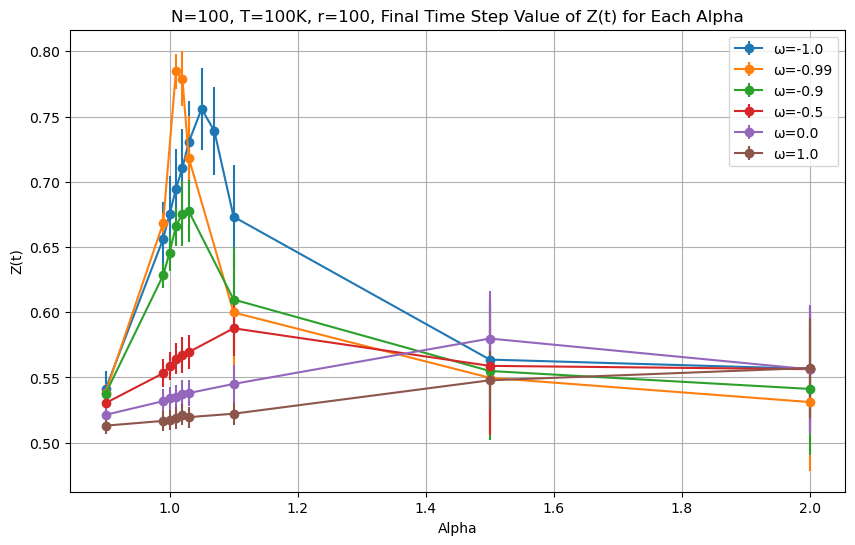

In [65]:
alpha09 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.9_alpha0.9.csv")
alpha099 = pd.read_csv("data/Zt/N100_T100K_r100_omega-0.9_alpha0.99.csv")
alpha1 = pd.read_csv("data/Zt/N100_T100K_r100_omega-0.9_alpha1.0.csv")
alpha101 = pd.read_csv("data/Zt/N100_T100K_r100_omega-0.9_alpha1.01.csv")
alpha102 = pd.read_csv("data/Zt/N100_T100K_r100_omega-0.9_alpha1.02.csv")
alpha103 = pd.read_csv("data/Zt/N100_T100K_r100_omega-0.9_alpha1.03.csv")
alpha11 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.9_alpha1.1.csv")
alpha15 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.9_alpha1.5.csv")
alpha2 = pd.read_csv("data/Zt/N100_T50K_r100_omega-0.9_alpha2.0.csv")

# 各データセットから最後の時刻の平均値と標準偏差を抽出
data = {
    'Alpha': [0.9, 0.99, 1.0, 1.01, 1.02, 1.03, 1.1, 1.5, 2.0],
    'Mean_Z(t)': [df['Z'].iloc[-1] for df in [alpha09, alpha099, alpha1, alpha101, alpha102, alpha103, alpha11, alpha15, alpha2]],
    'Std_Z(t)': [df['std'].iloc[-1] for df in [alpha09, alpha099, alpha1, alpha101, alpha102, alpha103, alpha11, alpha15, alpha2]]
}

# 新しいデータフレームを作成
plot_df_w_09 = pd.DataFrame(data)

# プロット作成
plt.figure(figsize=(10, 6))
plt.errorbar(plot_df_w_1['Alpha'], plot_df_w_1['Mean_Z(t)'], yerr=plot_df_w_1['Std_Z(t)'], fmt='o-', label='ω=-1.0')
plt.errorbar(plot_df_w_099['Alpha'], plot_df_w_099['Mean_Z(t)'], yerr=plot_df_w_099['Std_Z(t)'], fmt='o-', label='ω=-0.99')
plt.errorbar(plot_df_w_09['Alpha'], plot_df_w_09['Mean_Z(t)'], yerr=plot_df_w_09['Std_Z(t)'], fmt='o-', label='ω=-0.9')
plt.errorbar(plot_df_w_05['Alpha'], plot_df_w_05['Mean_Z(t)'], yerr=plot_df_w_05['Std_Z(t)'], fmt='o-', label='ω=-0.5')
plt.errorbar(plot_df_w0['Alpha'], plot_df_w0['Mean_Z(t)'], yerr=plot_df_w0['Std_Z(t)'], fmt='o-', label='ω=0.0')
plt.errorbar(plot_df_w1['Alpha'], plot_df_w1['Mean_Z(t)'], yerr=plot_df_w1['Std_Z(t)'], fmt='o-', label='ω=1.0')
plt.title("N=100, T=100K, r=100, Final Time Step Value of Z(t) for Each Alpha")
plt.xlabel('Alpha')
plt.ylabel('Z(t)')
plt.grid()
plt.legend()
plt.show()


In [78]:
N10_T10K_r100_omega1_alpha099 = pd.read_csv("../data/Zt/N10_T10K_r100_omega1.0_alpha0.99.csv")
N10_T10K_r100_omega0_alpha099 = pd.read_csv("../data/Zt/N10_T10K_r100_omega0.0_alpha0.99.csv")
N10_T10K_r100_omega_09_alpha099 = pd.read_csv("../data/Zt/N10_T10K_r100_omega-0.9_alpha0.99.csv")
N10_T10K_r100_omega_099_alpha099 = pd.read_csv("../data/Zt/N10_T10K_r100_omega-0.99_alpha0.99.csv")
N10_T10K_r100_omega_1_alpha099 = pd.read_csv("../data/Zt/N10_T10K_r100_omega-1.0_alpha0.99.csv")


In [79]:
# データフレームの結合
df = pd.concat([N10_T10K_r100_omega1_alpha099, N10_T10K_r100_omega0_alpha099['Z'], N10_T10K_r100_omega_09_alpha099['Z'], N10_T10K_r100_omega_099_alpha099['Z'], N10_T10K_r100_omega_1_alpha099['Z']], axis=1, ignore_index=True)
df.columns = ["t", "w=1.0", "w=0.0", "w=-0.9", "w=-0.99", "w=-1.0"]
df = df[df['t'] > 100]
df.head()


,t,w=1.0,w=0.0,w=-0.9,w=-0.99,w=-1.0
100,101,0.514,0.490,0.517,0.511,0.517
101,102,0.511,0.488,0.284,0.263,0.513
102,103,0.510,0.486,0.292,0.267,0.513
103,104,0.501,0.488,0.292,0.272,0.513
104,105,0.505,0.491,0.297,0.271,0.514


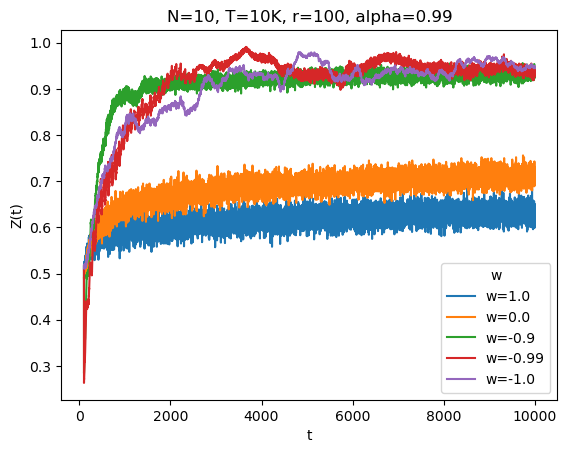

In [80]:
from matplotlib import pyplot as plt
import seaborn as sns

# データフレームを "long format" に変換します。
df_long = pd.melt(df, id_vars=['t'], var_name='w', value_name='Z(t)')

# lineplot を作成します。
sns.lineplot(data=df_long, x='t', y='Z(t)', hue='w')
# plt.xlim(100, 10000)

plt.title("N=10, T=10K, r=100, alpha=0.99")
# プロットを表示します。
plt.show()


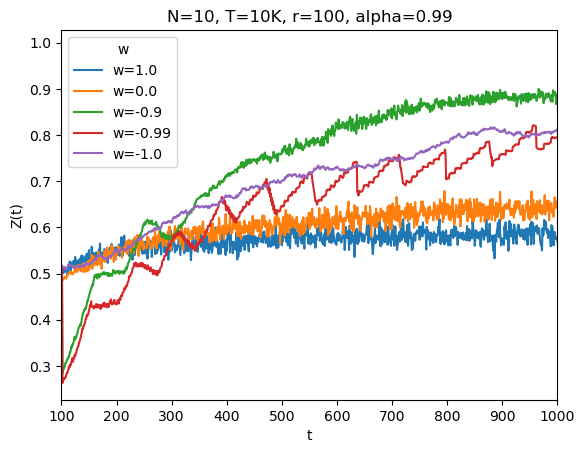

In [81]:
from matplotlib import pyplot as plt
import seaborn as sns

# データフレームを "long format" に変換します。
df_long = pd.melt(df, id_vars=['t'], var_name='w', value_name='Z(t)')

# lineplot を作成します。
sns.lineplot(data=df_long, x='t', y='Z(t)', hue='w')
plt.xlim(100, 1000)
plt.title("N=10, T=10K, r=100, alpha=0.99")
# プロットを表示します。
plt.show()


In [75]:
N10_T10K_r100_omega1_alpha101 = pd.read_csv("../data/Zt/N10_T10K_r100_omega1.0_alpha1.01.csv")
N10_T10K_r100_omega0_alpha101 = pd.read_csv("../data/Zt/N10_T10K_r100_omega0.0_alpha1.01.csv")
N10_T10K_r100_omega_09_alpha101 = pd.read_csv("../data/Zt/N10_T10K_r100_omega-0.9_alpha1.01.csv")
N10_T10K_r100_omega_099_alpha101 = pd.read_csv("../data/Zt/N10_T10K_r100_omega-0.99_alpha1.01.csv")
N10_T10K_r100_omega_1_alpha101 = pd.read_csv("../data/Zt/N10_T10K_r100_omega-1.0_alpha1.01.csv")


In [76]:
# データフレームの結合
df = pd.concat([N10_T10K_r100_omega1_alpha101, N10_T10K_r100_omega0_alpha101['Z'], N10_T10K_r100_omega_09_alpha101['Z'], N10_T10K_r100_omega_099_alpha101['Z'], N10_T10K_r100_omega_1_alpha101['Z']], axis=1, ignore_index=True)
df.columns = ["t", "w=1.0", "w=0.0", "w=-0.9", "w=-0.99", "w=-1.0"]
df = df[df['t'] > 100]
df.head()


,t,w=1.0,w=0.0,w=-0.9,w=-0.99,w=-1.0
100,101,0.494,0.486,0.503,0.518,0.505
101,102,0.489,0.485,0.262,0.252,0.499
102,103,0.490,0.486,0.268,0.252,0.500
103,104,0.492,0.490,0.269,0.257,0.502
104,105,0.488,0.491,0.273,0.259,0.504


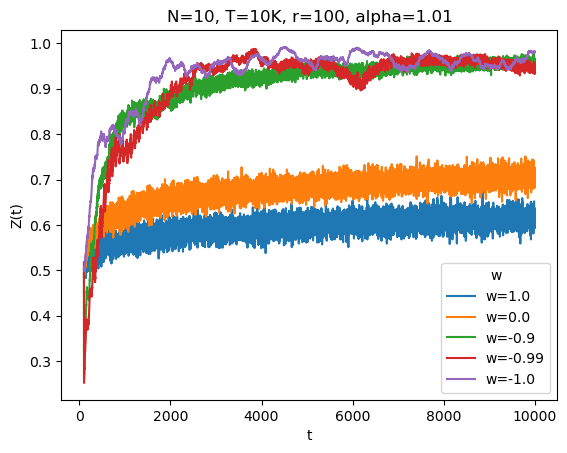

In [77]:
from matplotlib import pyplot as plt
import seaborn as sns

# データフレームを "long format" に変換します。
df_long = pd.melt(df, id_vars=['t'], var_name='w', value_name='Z(t)')

# lineplot を作成します。
sns.lineplot(data=df_long, x='t', y='Z(t)', hue='w')
# plt.xlim(100, 10000)

plt.title("N=10, T=10K, r=100, alpha=1.01")
# プロットを表示します。
plt.show()


In [72]:
N100_T10K_r100_omega1_alpha101 = pd.read_csv("../data/Zt/N100_T10K_r100_omega1.0_alpha1.01.csv")
N100_T10K_r100_omega0_alpha101 = pd.read_csv("../data/Zt/N100_T10K_r100_omega0.0_alpha1.01.csv")
N100_T10K_r100_omega_09_alpha101 = pd.read_csv("../data/Zt/N100_T10K_r100_omega-0.9_alpha1.01.csv")
N100_T10K_r100_omega_099_alpha101 = pd.read_csv("../data/Zt/N100_T10K_r100_omega-0.99_alpha1.01.csv")
N100_T10K_r100_omega_1_alpha101 = pd.read_csv("../data/Zt/N100_T10K_r100_omega-1.0_alpha1.01.csv")


In [73]:
# データフレームの結合
df = pd.concat([N100_T10K_r100_omega1_alpha101, N100_T10K_r100_omega0_alpha101['Z'], N100_T10K_r100_omega_09_alpha101['Z'], N100_T10K_r100_omega_099_alpha101['Z'], N100_T10K_r100_omega_1_alpha101['Z']], axis=1, ignore_index=True)
df.columns = ["t", "w=1.0", "w=0.0", "w=-0.9", "w=-0.99", "w=-1.0"]
df = df[df['t'] > 100]
df.head()


,t,w=1.0,w=0.0,w=-0.9,w=-0.99,w=-1.0
100,101,0.5042,0.4950,0.5103,0.5022,0.5039
101,102,0.4993,0.4899,0.2656,0.2539,0.4988
102,103,0.4965,0.4902,0.2708,0.2539,0.4990
103,104,0.4963,0.4906,0.2719,0.2588,0.4999
104,105,0.4950,0.4900,0.2770,0.2592,0.5001


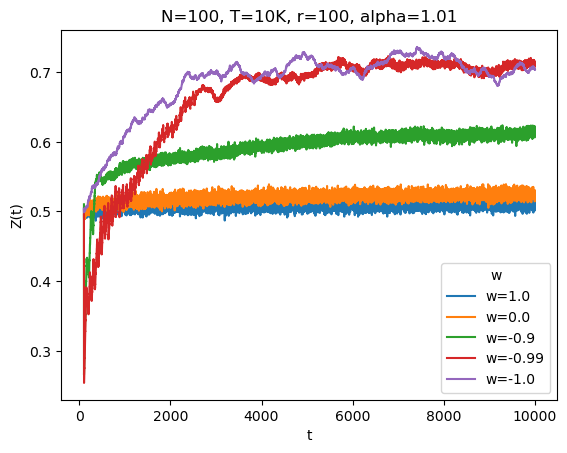

In [74]:
from matplotlib import pyplot as plt
import seaborn as sns

# データフレームを "long format" に変換します。
df_long = pd.melt(df, id_vars=['t'], var_name='w', value_name='Z(t)')

# lineplot を作成します。
sns.lineplot(data=df_long, x='t', y='Z(t)', hue='w')
# plt.xlim(100, 10000)

plt.title("N=100, T=10K, r=100, alpha=1.01")
# プロットを表示します。
plt.show()


In [87]:
alpha09 = pd.read_csv("../data/N100_T10K_t0100_alpha0.9_tau100.csv")
alpha1 = pd.read_csv("../data/N100_T10K_t0100_alpha1.0_tau100.csv")
alpha101 = pd.read_csv("../data/N100_T10K_t0100_alpha1.01_tau100.csv")
alpha2 = pd.read_csv("../data/N100_T10K_t0100_alpha2.0_tau100.csv")


In [88]:
# データフレームの結合
df = pd.concat([alpha09, alpha1['Z'], alpha101['Z'], alpha2['Z']], axis=1, ignore_index=True)
df.columns = ["t", "alpha=0.9", "alpha=1.0", "alpha=1.01", "alpha=2.0"]
df = df[df['t'] > 100]
df.head()


,t,alpha=0.9,alpha=1.0,alpha=1.01,alpha=2.0
100,101,0.510632,0.500603,0.491871,0.499444
101,102,0.510311,0.501216,0.491687,0.498674
102,103,0.510770,0.501662,0.491815,0.498540
103,104,0.511220,0.501790,0.492249,0.499178
104,105,0.509671,0.501763,0.492521,0.499191


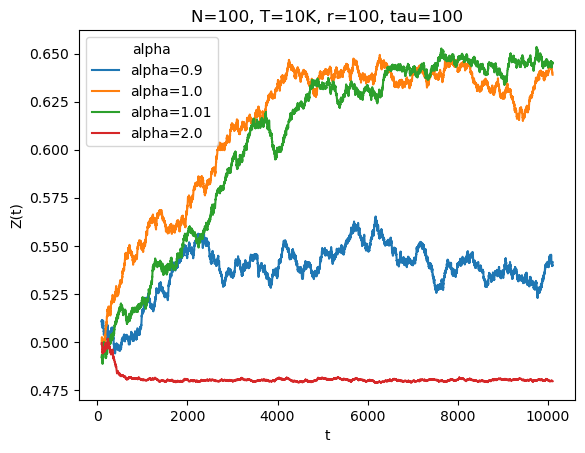

In [89]:
# データフレームを "long format" に変換
df_long = pd.melt(df, id_vars=['t'], var_name='alpha', value_name='Z(t)')

# lineplot を作成
sns.lineplot(data=df_long, x='t', y='Z(t)', hue='alpha')

plt.title("N=100, T=10K, r=100, tau=100")
plt.show()


In [ ]:
alpha09 = pd.read_csv("data/Zt/N100_T10K_t0100_alpha0.9_tau100.csv")
alpha1 = pd.read_csv("data/Zt/N100_T10K_t0100_alpha1.0_tau100.csv")
alpha101 = pd.read_csv("data/Zt/N100_T10K_t0100_alpha1.01_tau100.csv")
alpha2 = pd.read_csv("data/Zt/N100_T10K_t0100_alpha2.0_tau100.csv")

# データフレームの結合
# 平均値のためのデータフレーム
mean_df = pd.concat([alpha09['t'], alpha09['Z'], alpha1['Z'], alpha101['Z'], alpha2['Z']], axis=1)
mean_df.columns = ["t", "alpha=0.9", "alpha=1.0", "alpha=1.01", "alpha=2.0"]
mean_df = mean_df[mean_df['t'] > 100]

# 標準偏差のためのデータフレーム
std_df = pd.concat([alpha09['t'], alpha09['Z_std'], alpha1['Z_std'], alpha101['Z_std'], alpha2['Z_std']], axis=1)
std_df.columns = ["t", "alpha=0.9_std", "alpha=1.0_std", "alpha=1.01_std", "alpha=2.0_std"]
std_df = std_df[std_df['t'] > 100]
mean_df.head()


from matplotlib import pyplot as plt
import seaborn as sns

# 平均値データフレームを "long format" に変換
mean_long = pd.melt(mean_df, id_vars=['t'], var_name='alpha', value_name='Z(t)')

# lineplot を作成（平均値）
plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_long, x='t', y='Z(t)', hue='alpha', palette="tab10")

# 標準偏差の帯を追加
for column in mean_df.columns[1:]:
    alpha = column
    subset_mean = mean_df[['t', alpha]]
    subset_std = std_df[['t', alpha + '_std']]
    plt.fill_between(subset_mean['t'], subset_mean[alpha] - subset_std[alpha + '_std'],
                     subset_mean[alpha] + subset_std[alpha + '_std'], alpha=0.2)

plt.title("N=100, T=10K, r=100, tau=100")
plt.show()
